<a href="https://colab.research.google.com/github/gustavofurini/mestrado/blob/main/mestrado_datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Aula 1 - Pandas e Estatísticas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://jpbarddal.github.io/assets/data/datascience/Salaries.csv')
df.head(5)

Unnamed: 0      rank discipline  yrs.since.phd  yrs.service   sex  salary
0           1      Prof          B             19           18  Male  139750
1           2      Prof          B             20           16  Male  173200
2           3  AsstProf          B              4            3  Male   79750
3           4      Prof          B             45           39  Male  115000
4           5      Prof          B             40           41  Male  141500

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     397 non-null    int64 
 1   rank           397 non-null    object
 2   discipline     397 non-null    object
 3   yrs.since.phd  397 non-null    int64 
 4   yrs.service    397 non-null    int64 
 5   sex            397 non-null    object
 6   salary         397 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 21.8+ KB


In [4]:
df.shape

(397, 7)

In [5]:
df.columns

Index(['Unnamed: 0', 'rank', 'discipline', 'yrs.since.phd', 'yrs.service',
       'sex', 'salary'],
      dtype='object')

In [6]:
df.isna()

Unnamed: 0   rank  discipline  yrs.since.phd  yrs.service    sex  salary
0         False  False       False          False        False  False   False
1         False  False       False          False        False  False   False
2         False  False       False          False        False  False   False
3         False  False       False          False        False  False   False
4         False  False       False          False        False  False   False
..          ...    ...         ...            ...          ...    ...     ...
392       False  False       False          False        False  False   False
393       False  False       False          False        False  False   False
394       False  False       False          False        False  False   False
395       False  False       False          False        False  False   False
396       False  False       False          False        False  False   False

[397 rows x 7 columns]

In [7]:
df.isna().sum()

Unnamed: 0       0
rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [8]:
df = df.drop('Unnamed: 0', axis=1)

In [9]:
# Salário médio
df['salary'].mean()

np.float64(113706.45843828715)

In [10]:
# Maior salário
df['salary'].max()

231545

In [11]:
# Menor salário
df['salary'].min()

57800

In [12]:
# Desvio padrão
df['salary'].std()

30289.038694747804

In [13]:
# Moda
df['salary'].mode()

0    92000
Name: salary, dtype: int64

In [14]:
# Mediana
df['salary'].median()

107300.0

In [15]:
# Quartis
df['salary'].quantile([0.25, 0.5, 0.75])

0.25     91000.0
0.50    107300.0
0.75    134185.0
Name: salary, dtype: float64

In [16]:
# Os 10% dos professores que melhor ganham, ganham a partir de quanto?
df['salary'].quantile(0.9)

np.float64(152946.00000000003)

In [17]:
df[['salary','yrs.service']].mean()
# Colchetes mais interno é a representação de uma lista

salary         113706.458438
yrs.service        17.614610
dtype: float64

In [18]:
# Como identificar as linhas
moda = df['salary'].mode()
cond = df['salary'] == 92000
df[cond]

rank discipline  yrs.since.phd  yrs.service     sex  salary
146  AsstProf          B              4            4    Male   92000
151  AsstProf          B              4            4    Male   92000
154  AsstProf          B              4            0    Male   92000
179  AsstProf          B              3            3  Female   92000
197  AsstProf          B              4            4    Male   92000

In [19]:
cond = df['salary'].isin(moda)
df[cond]

rank discipline  yrs.since.phd  yrs.service     sex  salary
146  AsstProf          B              4            4    Male   92000
151  AsstProf          B              4            4    Male   92000
154  AsstProf          B              4            0    Male   92000
179  AsstProf          B              3            3  Female   92000
197  AsstProf          B              4            4    Male   92000

In [20]:
# Salário médio das professoras da disciplina A
cond_mulheres = df['sex'] == 'Female'
cond_disc_a = df['discipline'] == 'A'
df[cond_mulheres & cond_disc_a]['salary'].mean()

np.float64(89064.94444444444)

In [21]:
# Salário médio das professoras da disciplina B
cond_mulheres = df['sex'] == 'Female'
cond_disc_b = df['discipline'] == 'B'
df[cond_mulheres & cond_disc_b]['salary'].mean()

np.float64(111234.52380952382)

In [22]:
 # GROUPBY
df_mulheres = df[cond_mulheres]
df_mulheres.groupby('discipline')['salary'].mean()

discipline
A     89064.944444
B    111234.523810
Name: salary, dtype: float64

In [23]:
df.groupby(['sex', 'discipline'])['salary'].mean()

sex     discipline
Female  A              89064.944444
        B             111234.523810
Male    A             110699.981595
        B             118760.374359
Name: salary, dtype: float64

In [24]:
# Níveis de carreira de uma professor
df['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [25]:
# Média dos sálarios dos professor
df.groupby(['rank'])['salary'].mean()

rank
AssocProf     93876.437500
AsstProf      80775.985075
Prof         126772.109023
Name: salary, dtype: float64

In [26]:
df.groupby(['rank'])['salary'].max()

rank
AssocProf    126431
AsstProf      97032
Prof         231545
Name: salary, dtype: int64

In [27]:
# Menor, maior e salário médio dos professores por nível
df.groupby('rank')['salary'].agg(['min', 'max', 'mean'])

min     max           mean
rank                                   
AssocProf  62884  126431   93876.437500
AsstProf   63100   97032   80775.985075
Prof       57800  231545  126772.109023

In [28]:
# Quantidade de professores nas faixas de salário
salary = [0, 70000, 90000, 110000, float('inf')]
labels = ['<70k', '<90k', '<110k', '>=110k']

df['faixa_salarial'] = pd.cut(df['salary'], bins=salary, labels=labels, right=False)

contagem_por_faixa = df.groupby('faixa_salarial')['salary'].count()

contagem_por_faixa


<ipython-input-28-15295146434d>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem_por_faixa = df.groupby('faixa_salarial')['salary'].count()


faixa_salarial
<70k        8
<90k       86
<110k     121
>=110k    182
Name: salary, dtype: int64

In [29]:
# Diferença entre os salários médios por gênero
df.groupby(['sex'])['salary'].agg(['mean'])

mean
sex                  
Female  101002.410256
Male    115090.418994

In [30]:
# Diferença entre os salários médios por gênero e rank
df.groupby(['rank', 'sex'])['salary'].agg(['mean'])

mean
rank      sex                  
AssocProf Female   88512.800000
          Male     94869.703704
AsstProf  Female   78049.909091
          Male     81311.464286
Prof      Female  121967.611111
          Male    127120.822581

#**Aula 2 - Análises Univariadas**







#### **Visualizações**

<Axes: xlabel='salary', ylabel='Count'>

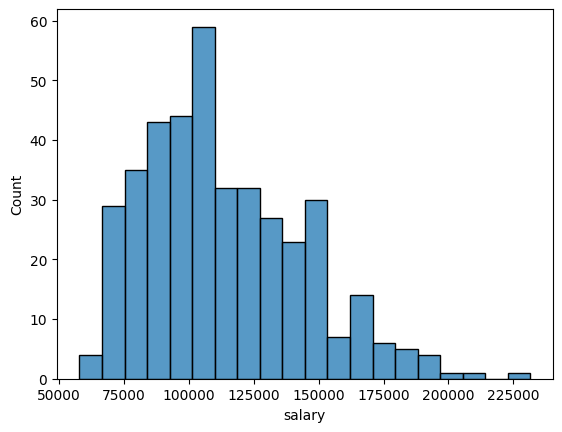

In [31]:
# Histograma
sns.histplot(x=df['salary'], bins=20)
# Assimetria Adireita e Positiva

<Axes: xlabel='salary', ylabel='Density'>

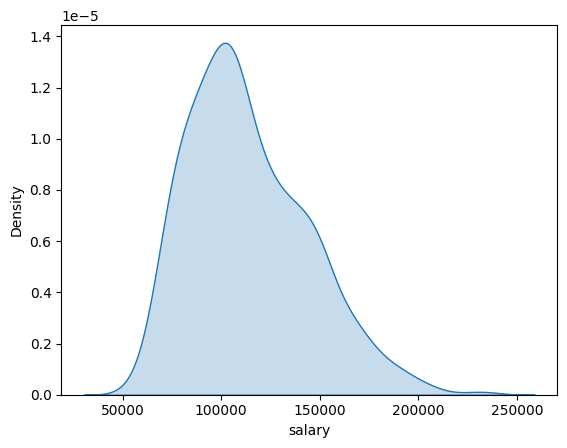

In [32]:
# KDE Plot (densidade)
sns.kdeplot(x=df['salary'], fill=True)

<Axes: xlabel='salary'>

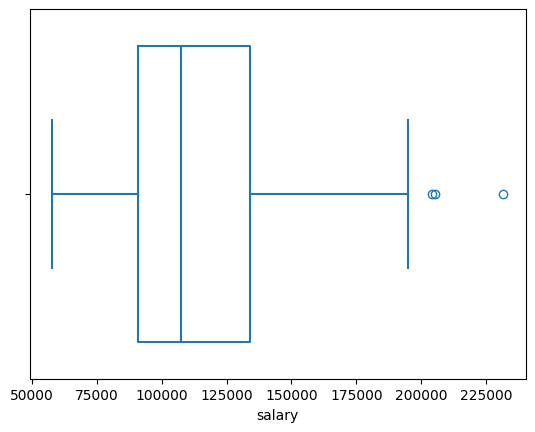

In [33]:
# Box Plot
sns.boxplot(x=df['salary'], fill = False)
# Metade dos professores ganham entre 107 e 134 mil? Não
# Metade dos professores ganham mais do que 90 mil? Não

<Axes: xlabel='salary'>

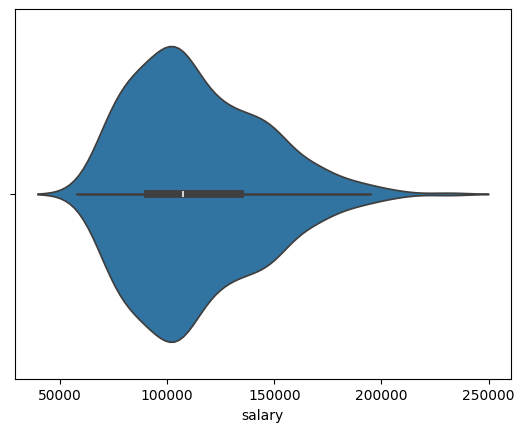

In [34]:
# Violinplot
sns.violinplot(x=df['salary'])

<Axes: xlabel='rank', ylabel='count'>

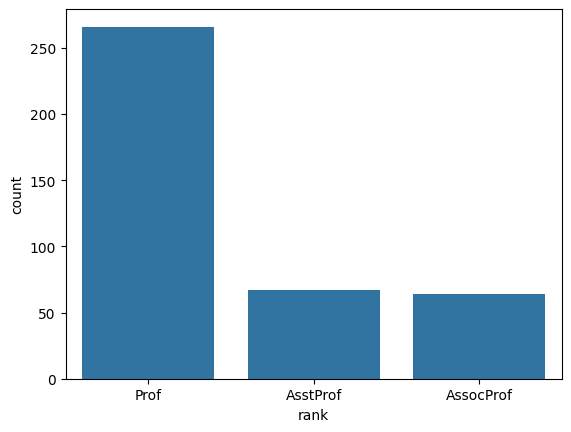

In [35]:
# Gráfico de Barras
sns.countplot(x=df['rank'])

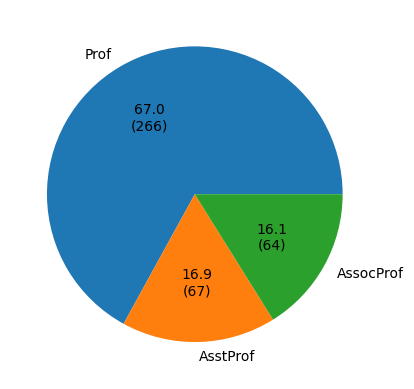

In [36]:
# Gráfico de Pizza
def autopct_format(values):
  def myfmt(pct):
    total = sum(values)
    val = int(round(pct * total/100.0))
    return f'{pct:.1f}\n({val})'
  return myfmt

s = df['rank'].value_counts()
plt.pie(s, labels=s.index, autopct=autopct_format(s))
plt.show()

#### **Atividade**

In [37]:
df2 = pd.read_csv('https://jpbarddal.github.io/assets/data/datascience/ommlbd_familiar.csv')
df2.replace(-9999, np.nan, inplace=True)

In [38]:
df2.head(5)

HS_CPF  QTDPESSOASCASA  MENORRENDACASA  MAIORRENDACASA  SOMARENDACASA  \
0   23325             NaN             NaN             NaN            NaN   
1  667198             NaN             NaN             NaN            NaN   
2  116666             NaN             NaN             NaN            NaN   
3  129342             2.0          1000.0          1200.0         2200.0   
4  681531             5.0           400.0          1400.0         4400.0   

   MEDIARENDACASA  MAIORIDADECASA  MENORIDADECASA  MEDIAIDADECASA  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3          1100.0            54.0            29.0            41.0   
4           880.0            43.0            16.0            25.0   

   INDICMENORDEIDADE  COBRANCABAIXOCASA  COBRANCAMEDIOCASA  COBRANCAALTACASA  \
0                NaN                NaN                NaN               NaN   
1                NaN                NaN                NaN               NaN   
2                NaN                NaN                NaN               NaN   
3                0.0                0.0                0.0               0.0   
4                1.0                0.0                0.0               0.0   

   SEGMENTACAOFINBAIXACASA  SEGMENTACAOFINMEDIACASA  SEGMENTACAOALTACASA  \
0                      NaN                      NaN                  NaN   
1                      NaN                      NaN                  NaN   
2                      NaN                      NaN                  NaN   
3                      0.0                      0.0                  0.0   
4                      0.0                      0.0                  0.0   

   BOLSAFAMILIACASA  FUNCIONARIOPUBLICOCASA  
0               NaN                     NaN  
1               NaN                     NaN  
2               NaN                     NaN  
3               0.0                     0.0  
4               1.0                     1.0

In [39]:
100 * df2.isna().sum() / len(df2)

HS_CPF                      0.000000
QTDPESSOASCASA             62.289599
MENORRENDACASA             62.289599
MAIORRENDACASA             62.289599
SOMARENDACASA              62.289599
MEDIARENDACASA             62.289599
MAIORIDADECASA             62.300535
MENORIDADECASA             62.300535
MEDIAIDADECASA             62.300535
INDICMENORDEIDADE          62.289599
COBRANCABAIXOCASA          62.289599
COBRANCAMEDIOCASA          62.289599
COBRANCAALTACASA           62.289599
SEGMENTACAOFINBAIXACASA    62.289599
SEGMENTACAOFINMEDIACASA    62.289599
SEGMENTACAOALTACASA        62.289599
BOLSAFAMILIACASA           62.289599
FUNCIONARIOPUBLICOCASA     62.289599
dtype: float64

In [40]:
df.shape

(397, 7)

In [41]:
df2.columns

Index(['HS_CPF', 'QTDPESSOASCASA', 'MENORRENDACASA', 'MAIORRENDACASA',
       'SOMARENDACASA', 'MEDIARENDACASA', 'MAIORIDADECASA', 'MENORIDADECASA',
       'MEDIAIDADECASA', 'INDICMENORDEIDADE', 'COBRANCABAIXOCASA',
       'COBRANCAMEDIOCASA', 'COBRANCAALTACASA', 'SEGMENTACAOFINBAIXACASA',
       'SEGMENTACAOFINMEDIACASA', 'SEGMENTACAOALTACASA', 'BOLSAFAMILIACASA',
       'FUNCIONARIOPUBLICOCASA'],
      dtype='object')

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438924 entries, 0 to 438923
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   HS_CPF                   438924 non-null  int64  
 1   QTDPESSOASCASA           165520 non-null  float64
 2   MENORRENDACASA           165520 non-null  float64
 3   MAIORRENDACASA           165520 non-null  float64
 4   SOMARENDACASA            165520 non-null  float64
 5   MEDIARENDACASA           165520 non-null  float64
 6   MAIORIDADECASA           165472 non-null  float64
 7   MENORIDADECASA           165472 non-null  float64
 8   MEDIAIDADECASA           165472 non-null  float64
 9   INDICMENORDEIDADE        165520 non-null  float64
 10  COBRANCABAIXOCASA        165520 non-null  float64
 11  COBRANCAMEDIOCASA        165520 non-null  float64
 12  COBRANCAALTACASA         165520 non-null  float64
 13  SEGMENTACAOFINBAIXACASA  165520 non-null  float64
 14  SEGM

In [43]:
df2.describe()

HS_CPF  QTDPESSOASCASA  MENORRENDACASA  MAIORRENDACASA  \
count  438924.000000   165520.000000   165520.000000   165520.000000   
mean   324130.294748        2.993542     1211.068753     5259.854398   
std    205825.214515        1.231989     1438.357620     6079.701542   
min         0.000000        2.000000      400.000000      400.000000   
25%    147907.750000        2.000000      800.000000     1200.000000   
50%    294081.500000        3.000000      900.000000     3000.000000   
75%    515903.250000        4.000000     1000.000000     7000.000000   
max    698720.000000       10.000000    30000.000000    30000.000000   

       SOMARENDACASA  MEDIARENDACASA  MAIORIDADECASA  MENORIDADECASA  \
count  165520.000000   165520.000000   165472.000000   165472.000000   
mean     8306.661431     2902.041409       50.904298       24.809690   
std      8445.786665     2984.834142       13.807128       10.886317   
min       800.000000      400.000000        4.000000        1.000000   
25%      2900.000000     1000.000000       42.000000       18.000000   
50%      5400.000000     1800.000000       49.000000       23.000000   
75%     10300.000000     3533.000000       58.000000       30.000000   
max    100000.000000    30000.000000      128.000000      103.000000   

       MEDIAIDADECASA  INDICMENORDEIDADE  COBRANCABAIXOCASA  \
count   165472.000000      165520.000000      165520.000000   
mean        36.196613           0.064669           0.059981   
std         10.893769           0.245941           0.237452   
min          4.000000           0.000000           0.000000   
25%         29.000000           0.000000           0.000000   
50%         34.000000           0.000000           0.000000   
75%         42.000000           0.000000           0.000000   
max        103.000000           1.000000           1.000000   

       COBRANCAMEDIOCASA  COBRANCAALTACASA  SEGMENTACAOFINBAIXACASA  \
count      165520.000000     165520.000000            165520.000000   
mean            0.005486          0.003160                 0.063575   
std             0.073863          0.056123                 0.243996   
min             0.000000          0.000000                 0.000000   
25%             0.000000          0.000000                 0.000000   
50%             0.000000          0.000000                 0.000000   
75%             0.000000          0.000000                 0.000000   
max             1.000000          1.000000                 1.000000   

       SEGMENTACAOFINMEDIACASA  SEGMENTACAOALTACASA  BOLSAFAMILIACASA  \
count            165520.000000        165520.000000     165520.000000   
mean                  0.001172             0.000085          0.206803   
std                   0.034215             0.009196          0.405014   
min                   0.000000             0.000000          0.000000   
25%                   0.000000             0.000000          0.000000   
50%                   0.000000             0.000000          0.000000   
75%                   0.000000             0.000000          0.000000   
max                   1.000000             1.000000          1.000000   

       FUNCIONARIOPUBLICOCASA  
count           165520.000000  
mean                 0.197499  
std                  0.398113  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  0.000000  
max                  1.000000

<Axes: xlabel='SOMARENDACASA', ylabel='Count'>

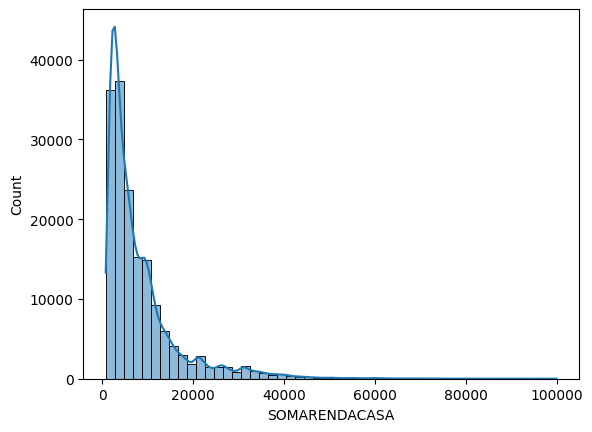

In [44]:
sns.histplot(x=df2['SOMARENDACASA'], bins=50, kde=True)
# Assimétrica direita

<Axes: xlabel='SOMARENDACASA'>

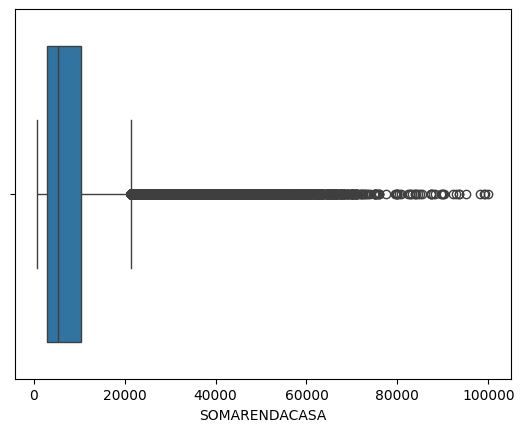

In [45]:
sns.boxplot(x=df2['SOMARENDACASA'])

#### **Transformação de Dados**

In [46]:
from sklearn.preprocessing import PowerTransformer

<Axes: xlabel='SOMARENDACASA', ylabel='Count'>

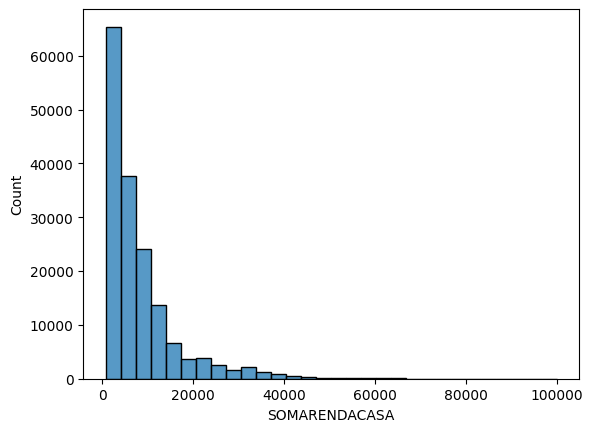

In [47]:
rendas_antes = df2['SOMARENDACASA']
sns.histplot(x=rendas_antes, bins=30)

In [48]:
# Box-cox: limitação (só funciona com dados positivos)
# Yeo-johnson: (aceita números, negativos, zero, positivos, etc)
#bc = PowerTransformer(method='box-cox')
bc = PowerTransformer(method='yeo-johnson')
rendas_depois = bc.fit_transform(rendas_antes.values.reshape(-1, 1))
# Melhor para modelagens preditivas

<Axes: ylabel='Count'>

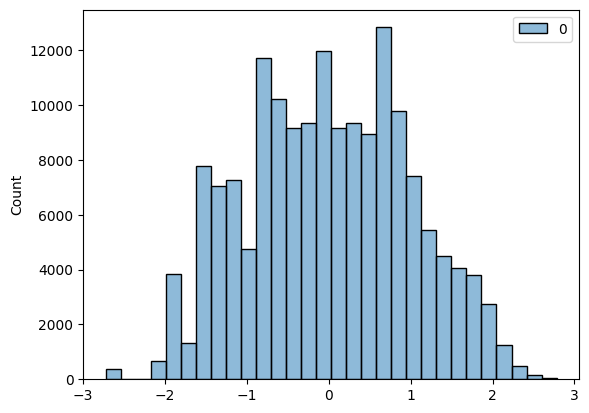

In [49]:
sns.histplot(rendas_depois, bins=30)

<Axes: ylabel='Count'>

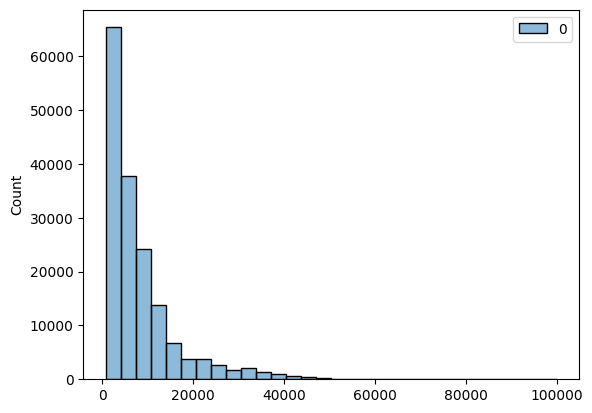

In [50]:
renda_volta = bc.inverse_transform(rendas_depois)
sns.histplot(renda_volta, bins=30)

In [51]:
transformador = PowerTransformer(method='yeo-johnson')
df_transformado = pd.DataFrame(data=transformador.fit_transform(df2), columns=df2.columns)

In [52]:
# Invertigar: Pipeline (sklearn)

#**Aula 3 - Análises Multivariada de Dados**


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv('https://jpbarddal.github.io/assets/data/datascience/Salaries.csv')
df.head(5)

Unnamed: 0      rank discipline  yrs.since.phd  yrs.service   sex  salary
0           1      Prof          B             19           18  Male  139750
1           2      Prof          B             20           16  Male  173200
2           3  AsstProf          B              4            3  Male   79750
3           4      Prof          B             45           39  Male  115000
4           5      Prof          B             40           41  Male  141500

<Axes: xlabel='yrs.service', ylabel='salary'>

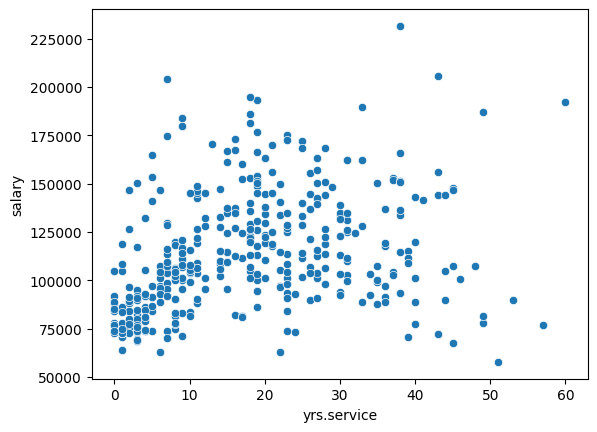

In [55]:
# Scatterplot
sns.scatterplot(x=df['yrs.service'],
                y=df['salary'])

<Axes: xlabel='rank', ylabel='salary'>

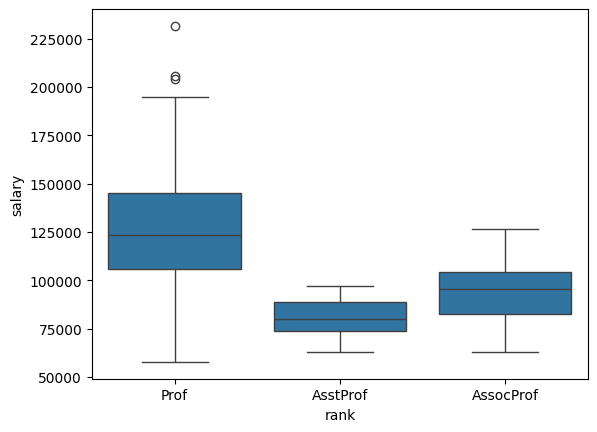

In [56]:
# Passar do scatterplot para o boxplot, a consequencia ruim de não saber
# onde os dados estão exatamente mas temos uma visão melhor da proporção
sns.boxplot(x=df['rank'],
                y=df['salary'])

<Axes: xlabel='rank', ylabel='salary'>

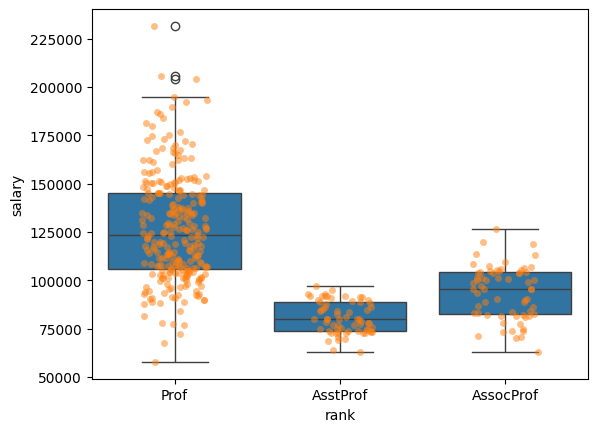

In [57]:
sns.boxplot(x=df['rank'],
                y=df['salary'])
sns.stripplot(x=df['rank'],
                y=df['salary'], jitter=0.2, alpha=0.5)

<Axes: xlabel='rank', ylabel='salary'>

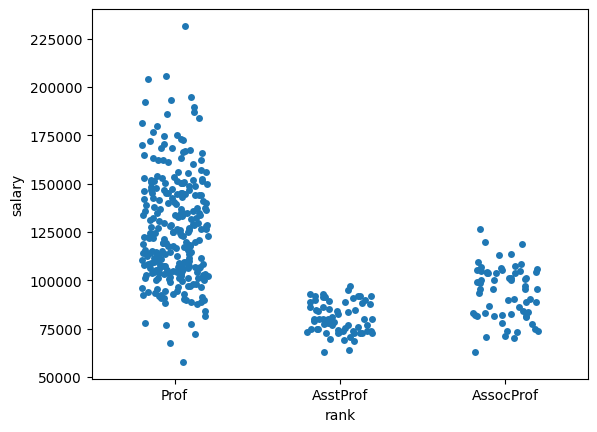

In [58]:
sns.stripplot(x=df['rank'],
                y=df['salary'], jitter=0.2)

<Axes: xlabel='rank', ylabel='salary'>

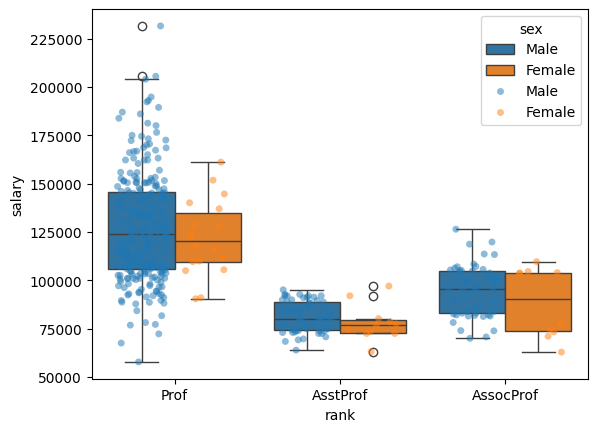

In [59]:
sns.boxplot(x=df['rank'],
            y=df['salary'],
            hue=df['sex'])

sns.stripplot(x=df['rank'],
                y=df['salary'],
                hue=df['sex'],
                jitter=0.3,
                dodge=True,
                alpha=0.5)

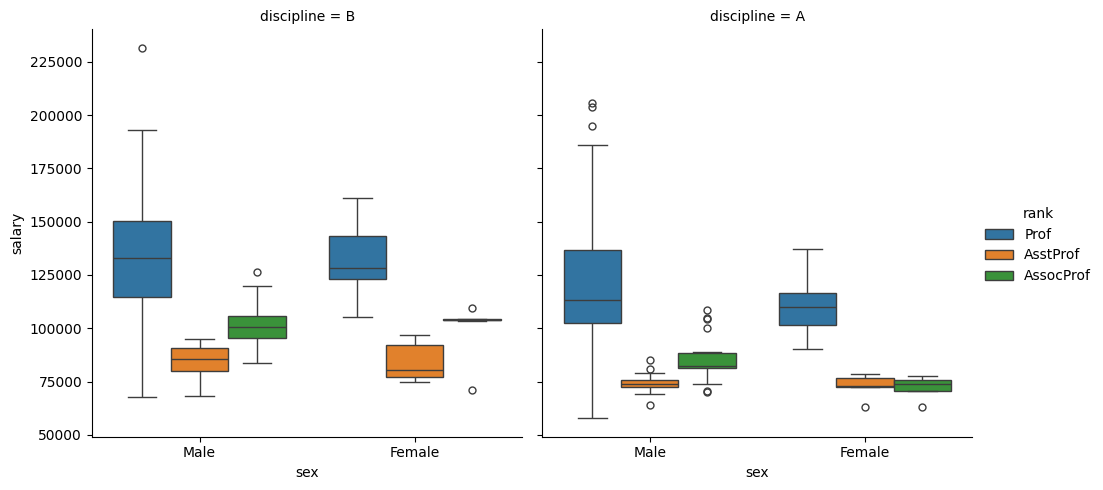

In [60]:
sns.catplot(
    data=df,
    x="sex",
    y="salary",
    col="discipline",
    hue='rank',
    kind="box",
)

<Axes: xlabel='yrs.service', ylabel='salary'>

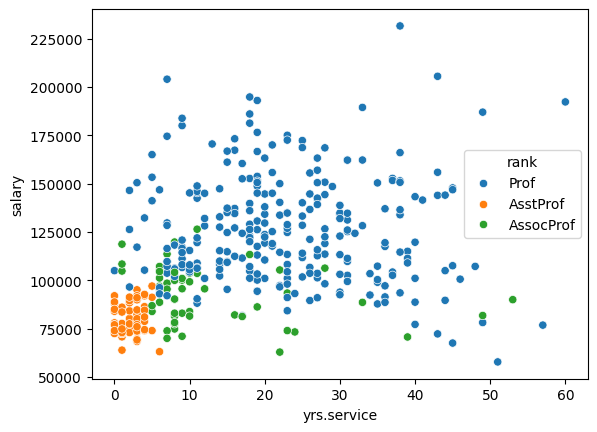

In [61]:
# Cluster
sns.scatterplot(x=df['yrs.service'],
                y=df['salary'],
                hue=df['rank'])

<Axes: xlabel='yrs.service', ylabel='salary'>

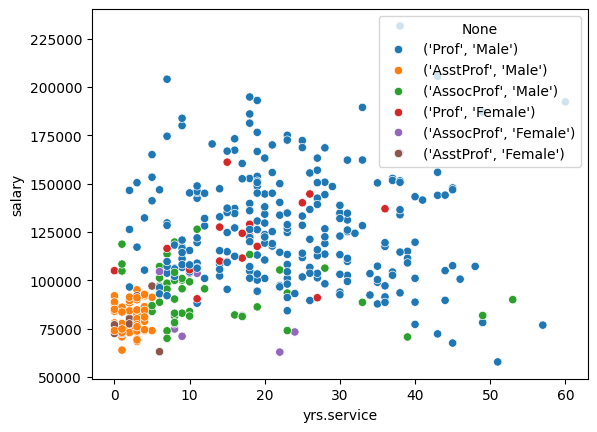

In [62]:
sns.scatterplot(x=df['yrs.service'],
                y=df['salary'],
                hue=df[['rank', 'sex']].apply(tuple, axis=1))

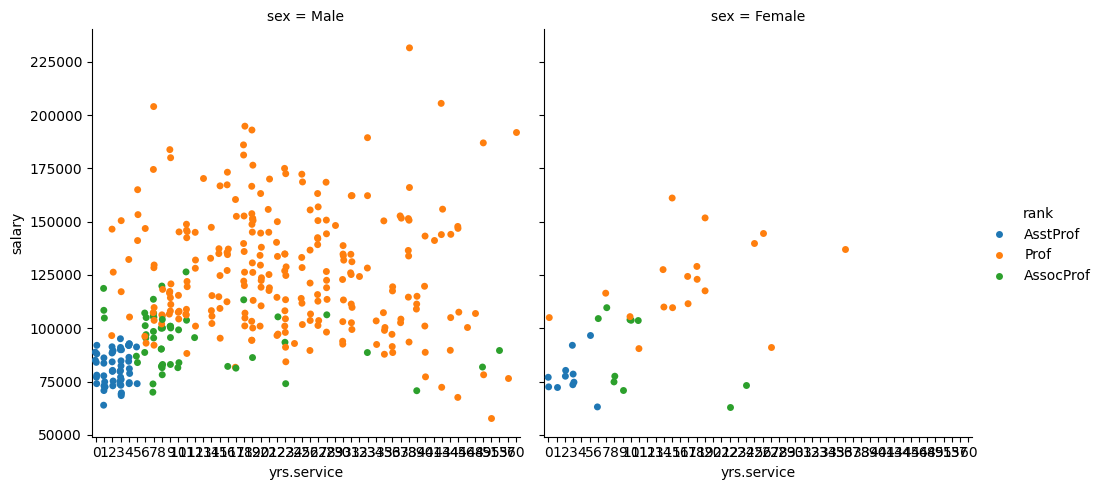

In [63]:
sns.catplot(x=df['yrs.service'],
            y=df['salary'],
            hue=df['rank'],
            col=df['sex'])

<Axes: xlabel='yrs.service', ylabel='salary'>

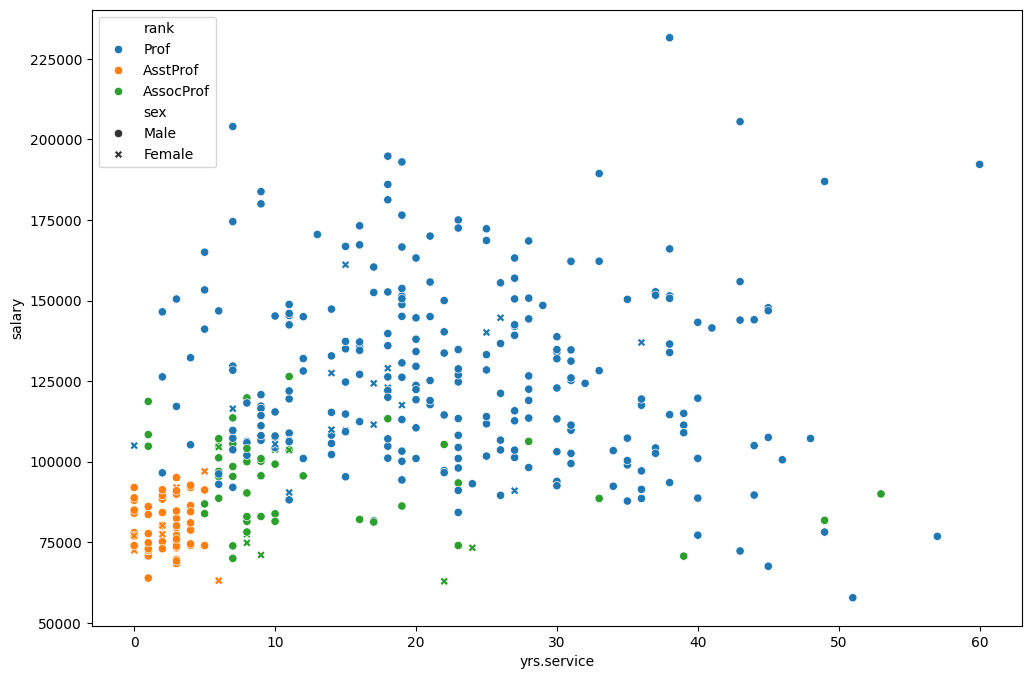

In [64]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['yrs.service'],
                y=df['salary'],
                hue=df['rank'],
                style=df['sex'])

<Axes: xlabel='rank', ylabel='salary'>

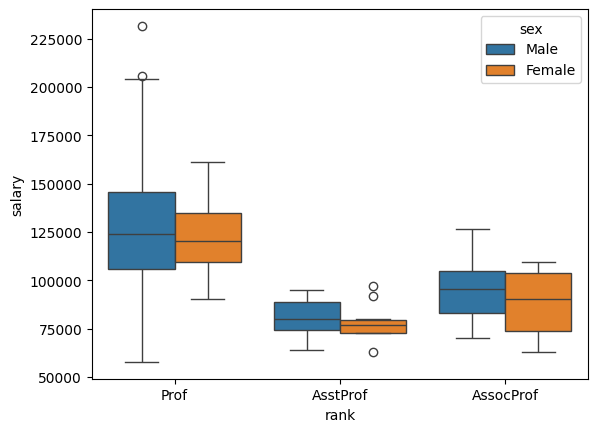

In [65]:
sns.boxplot(x=df['rank'],
            y=df['salary'],
            hue=df['sex'])

In [66]:
# Criar a base
df = pd.DataFrame({
    'x' : np.random.normal(10, 1.2, 20000),
    'y' : np.random.normal(10, 1.2, 20000),
    'group' : np.repeat('A', 20000)
})

tmp1 = pd.DataFrame({
    'x' : np.random.normal(14.5, 1.2, 20000),
    'y' : np.random.normal(14.5, 1.2, 20000),
    'group' : np.repeat('B', 20000)
})

tmp2 = pd.DataFrame({
    'x' : np.random.normal(9.5, 1.5, 20000),
    'y' : np.random.normal(15.5, 1.5, 20000),
    'group' : np.repeat('C', 20000)
})

# concatenating the data
df = pd.concat([df, tmp1, tmp2])


In [67]:
df

x          y group
0      12.417324   9.771439     A
1      11.467598   8.774710     A
2       9.650414  10.844884     A
3      10.552136  11.044584     A
4       9.939968   9.863838     A
...          ...        ...   ...
19995  10.238050  15.293958     C
19996  12.612565  14.913056     C
19997   8.623441  15.298142     C
19998   9.506727  16.081525     C
19999  12.154360  14.022259     C

[60000 rows x 3 columns]

<Axes: xlabel='x', ylabel='y'>

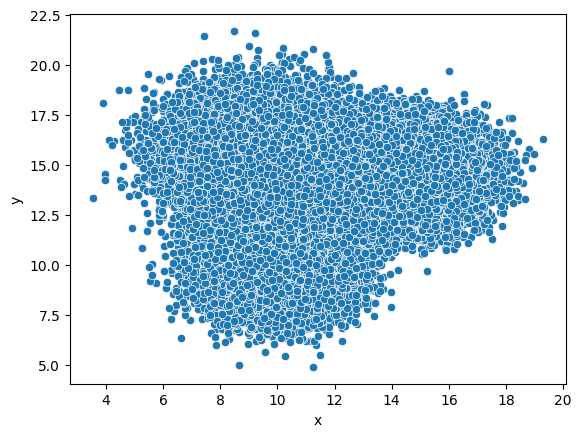

In [68]:
sns.scatterplot(x=df['x'], y=df['y'])

<Axes: xlabel='x', ylabel='y'>

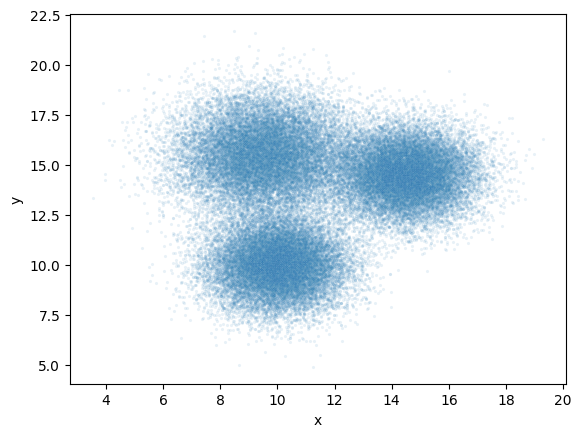

In [69]:
sns.scatterplot(x=df['x'], y=df['y'], s=5, alpha=0.1)

<Axes: xlabel='x', ylabel='y'>

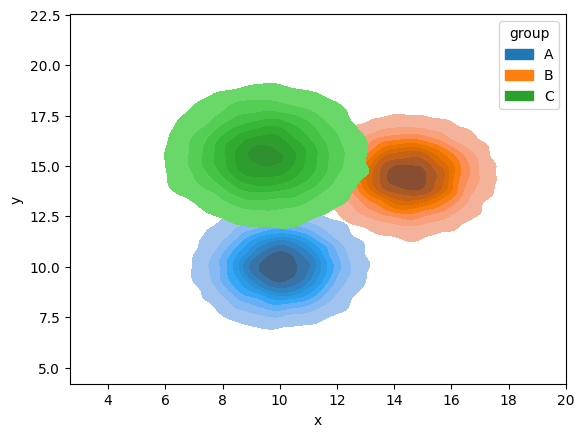

In [70]:
# densidade
sns.kdeplot(x=df['x'], y=df['y'], fill=True, hue=df['group'])

<Axes: xlabel='x', ylabel='y'>

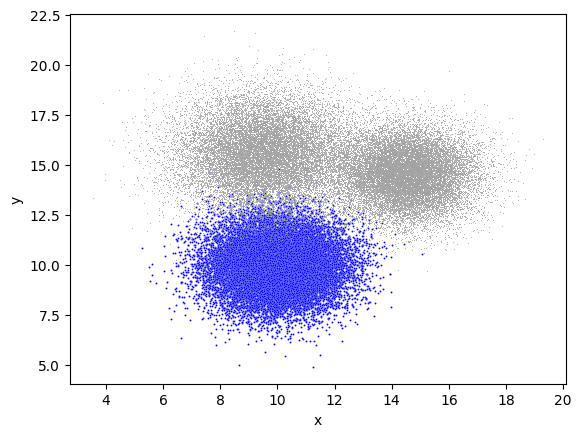

In [71]:
# Plotando apenas o grupo A com uma cor diferente
df_a = df[df['group'] == 'A']
df_resto = df[df['group'] != 'A']
sns.scatterplot(x=df_a['x'], y=df_a['y'], color='blue', s=2)
sns.scatterplot(x=df_resto['x'], y=df_resto['y'], color='gray', s=0.5)




#### **Atividade**

In [72]:
df_kobe = pd.read_csv('https://www.dropbox.com/s/m1e44xinrkn99qq/kobe_shots.csv?dl=1')
df_kobe.head(5)

action_type combined_shot_type  game_event_id   game_id      lat  \
0          Jump Shot          Jump Shot             10  20000012  33.9723   
1          Jump Shot          Jump Shot             12  20000012  34.0443   
2          Jump Shot          Jump Shot             35  20000012  33.9093   
3          Jump Shot          Jump Shot             43  20000012  33.8693   
4  Driving Dunk Shot               Dunk            155  20000012  34.0443   

   loc_x  loc_y       lon  minutes_remaining  period  ...       shot_type  \
0    167     72 -118.1028                 10       1  ...  2PT Field Goal   
1   -157      0 -118.4268                 10       1  ...  2PT Field Goal   
2   -101    135 -118.3708                  7       1  ...  2PT Field Goal   
3    138    175 -118.1318                  6       1  ...  2PT Field Goal   
4      0      0 -118.2698                  6       2  ...  2PT Field Goal   

          shot_zone_area  shot_zone_basic  shot_zone_range     team_id  \
0          Right Side(R)        Mid-Range        16-24 ft.  1610612747   
1           Left Side(L)        Mid-Range         8-16 ft.  1610612747   
2   Left Side Center(LC)        Mid-Range        16-24 ft.  1610612747   
3  Right Side Center(RC)        Mid-Range        16-24 ft.  1610612747   
4              Center(C)  Restricted Area  Less Than 8 ft.  1610612747   

            team_name   game_date    matchup opponent  shot_id  
0  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        1  
1  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        2  
2  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        3  
3  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        4  
4  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        5  

[5 rows x 25 columns]

In [73]:
df_kobe.shape

(30697, 25)

In [74]:
df_kobe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [75]:
df_kobe.isnull().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
shot_id                  0
dtype: int64

In [76]:
df_kobe.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

**Tentativas de arremessos**

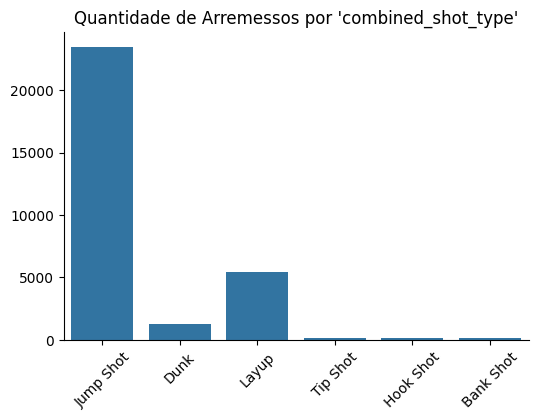

In [77]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df_kobe['combined_shot_type'])
plt.xticks(rotation=45)
plt.title("Quantidade de Arremessos por 'combined_shot_type'")
plt.xlabel("")
plt.ylabel("")
sns.despine()

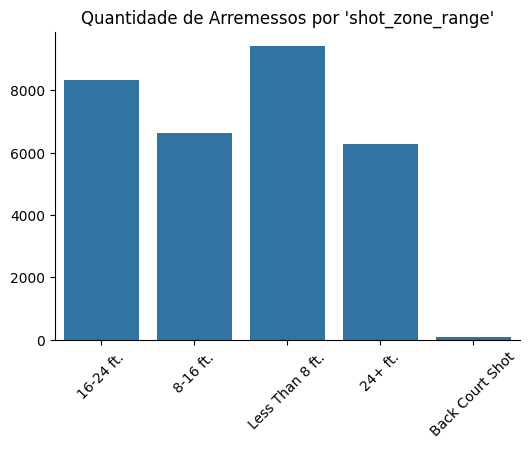

In [78]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df_kobe['shot_zone_range'])
plt.xticks(rotation=45)
plt.title("Quantidade de Arremessos por 'shot_zone_range'")
plt.xlabel("")
plt.ylabel("")
sns.despine()

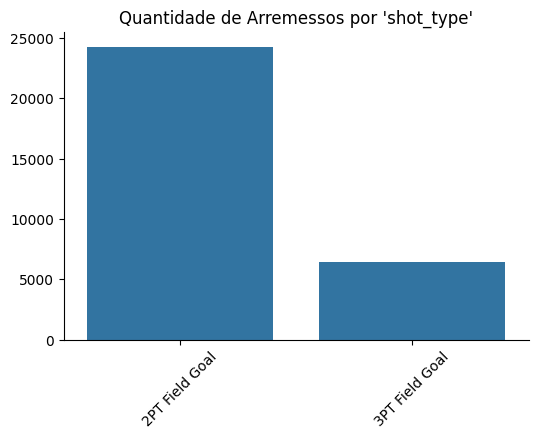

In [79]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df_kobe['shot_type'])
plt.xticks(rotation=45)
plt.title("Quantidade de Arremessos por 'shot_type'")
plt.xlabel("")
plt.ylabel("")
sns.despine()

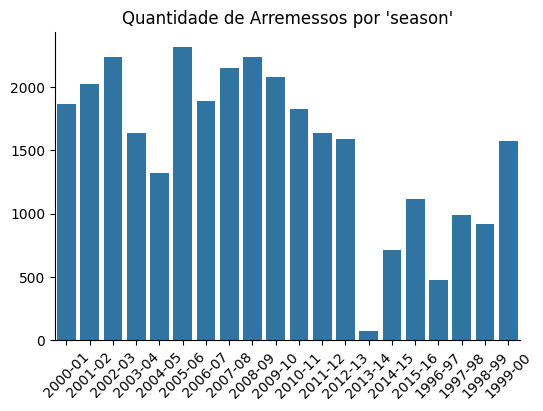

In [80]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df_kobe['season'])
plt.xticks(rotation=45)
plt.title("Quantidade de Arremessos por 'season'")
plt.xlabel("")
plt.ylabel("")
sns.despine()

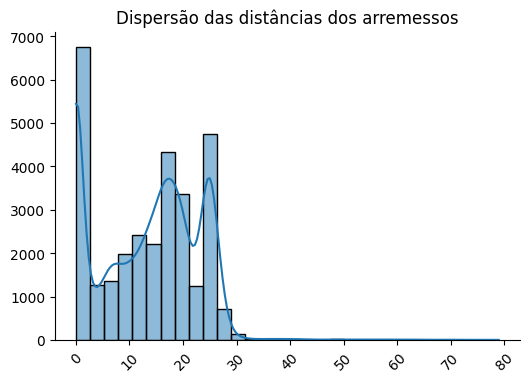

In [81]:
plt.figure(figsize=(6, 4))
sns.histplot(x=df_kobe['shot_distance'], bins=30, kde=True)
plt.xticks(rotation=45)
plt.title("Dispersão das distâncias dos arremessos")
plt.xlabel("")
plt.ylabel("")
sns.despine()

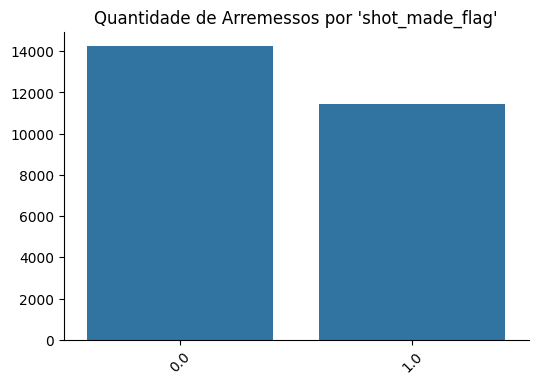

In [82]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df_kobe['shot_made_flag'])
plt.xticks(rotation=45)
plt.title("Quantidade de Arremessos por 'shot_made_flag'")
plt.xlabel("")
plt.ylabel("")
sns.despine()

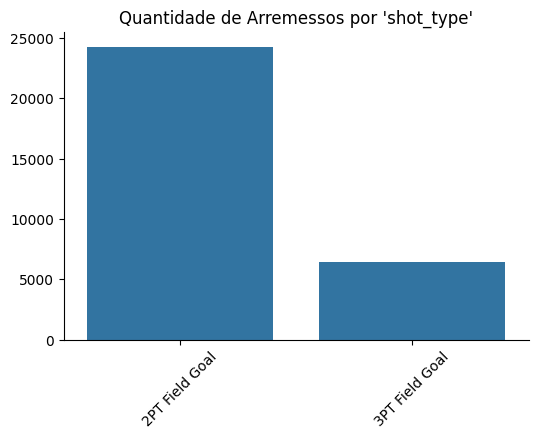

In [83]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df_kobe['shot_type'])
plt.xticks(rotation=45)
plt.title("Quantidade de Arremessos por 'shot_type'")
plt.xlabel("")
plt.ylabel("")
sns.despine()

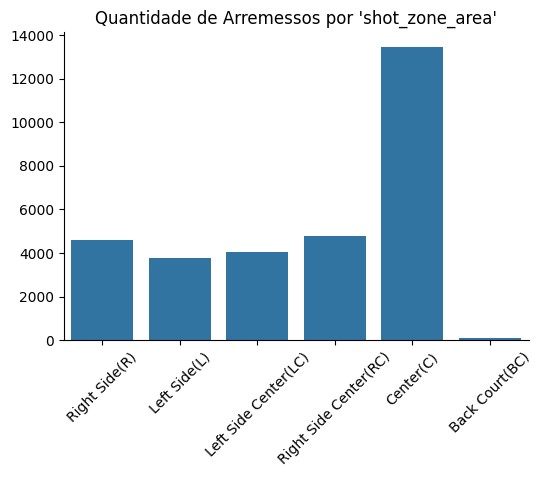

In [84]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df_kobe['shot_zone_area'])
plt.xticks(rotation=45)
plt.title("Quantidade de Arremessos por 'shot_zone_area'")
plt.xlabel("")
plt.ylabel("")
sns.despine()

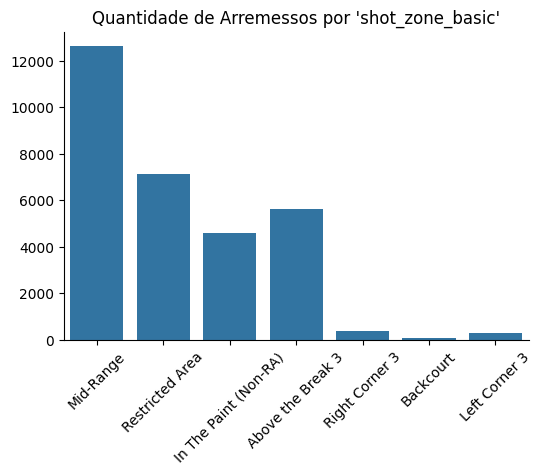

In [85]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df_kobe['shot_zone_basic'])
plt.xticks(rotation=45)
plt.title("Quantidade de Arremessos por 'shot_zone_basic'")
plt.xlabel("")
plt.ylabel("")
sns.despine()

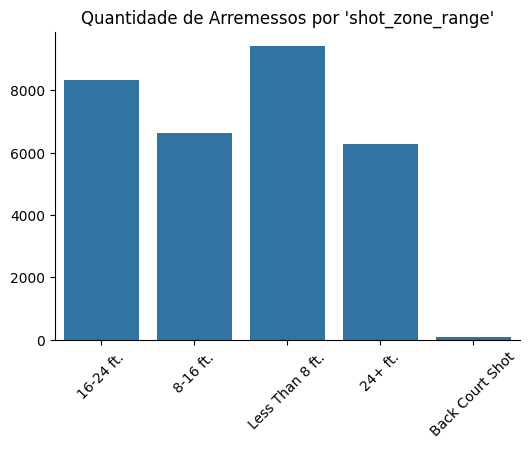

In [86]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df_kobe['shot_zone_range'])
plt.xticks(rotation=45)
plt.title("Quantidade de Arremessos por 'shot_zone_range'")
plt.xlabel("")
plt.ylabel("")
sns.despine()

**Anlálises Multivariadas**

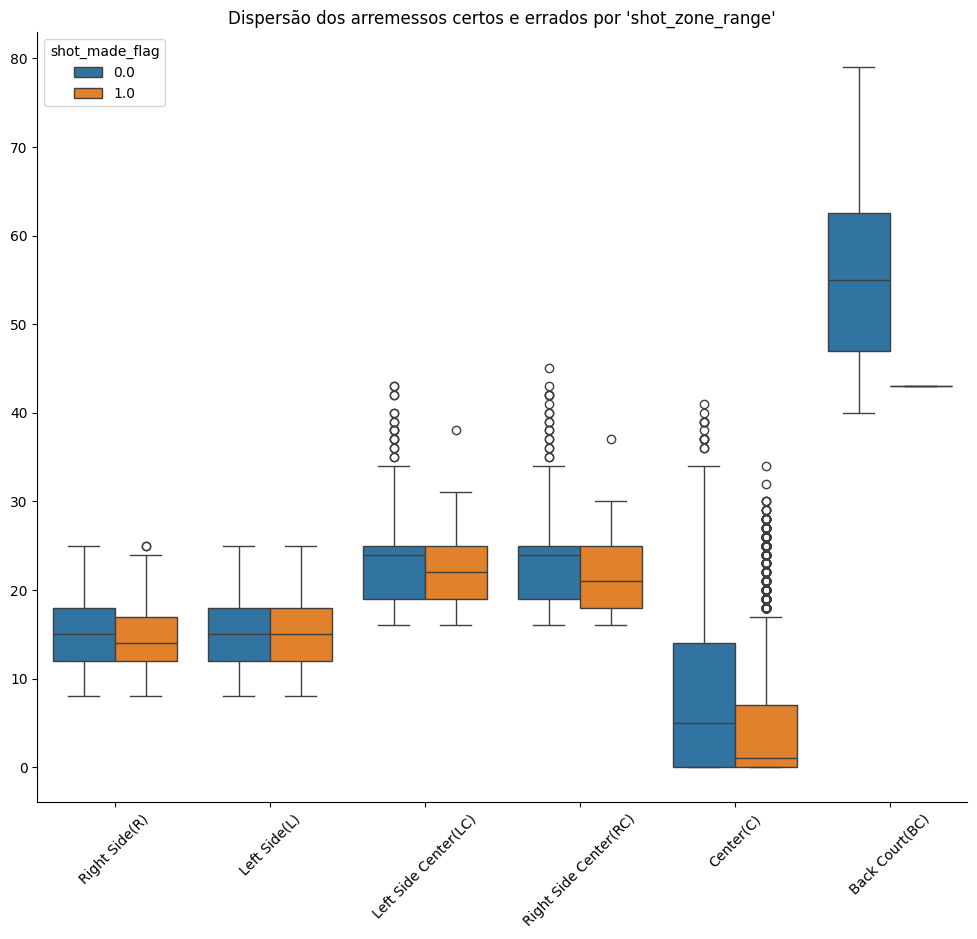

In [87]:
plt.figure(figsize=(12, 10))
sns.boxplot(x=df_kobe['shot_zone_area'], y=df_kobe['shot_distance'], hue=df_kobe['shot_made_flag'])
plt.xticks(rotation=45)
plt.title("Dispersão dos arremessos certos e errados por 'shot_zone_range'")
plt.xlabel("")
plt.ylabel("")
sns.despine()

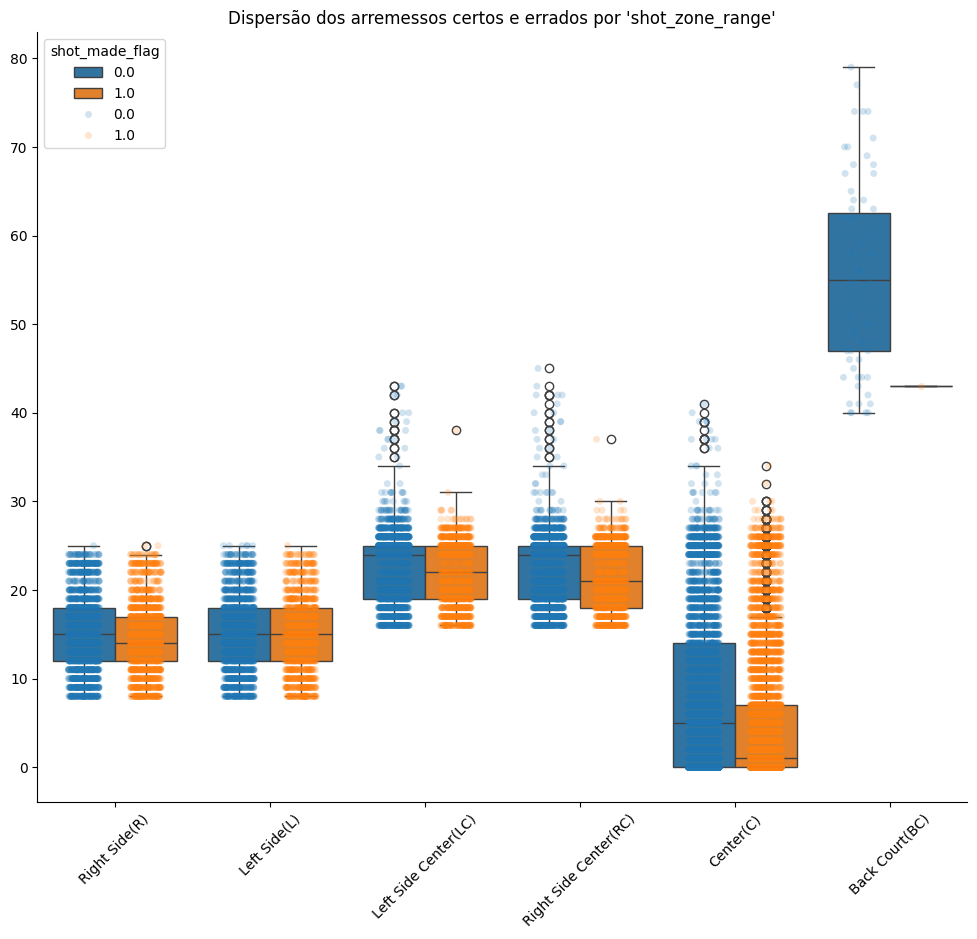

In [88]:
plt.figure(figsize=(12, 10))
sns.boxplot(x=df_kobe['shot_zone_area'], y=df_kobe['shot_distance'], hue=df_kobe['shot_made_flag'])
sns.stripplot(x=df_kobe['shot_zone_area'], y=df_kobe['shot_distance'], hue=df_kobe['shot_made_flag'], jitter=0.2, dodge=True, alpha=0.2)
plt.xticks(rotation=45)
plt.title("Dispersão dos arremessos certos e errados por 'shot_zone_range'")
plt.xlabel("")
plt.ylabel("")
sns.despine()

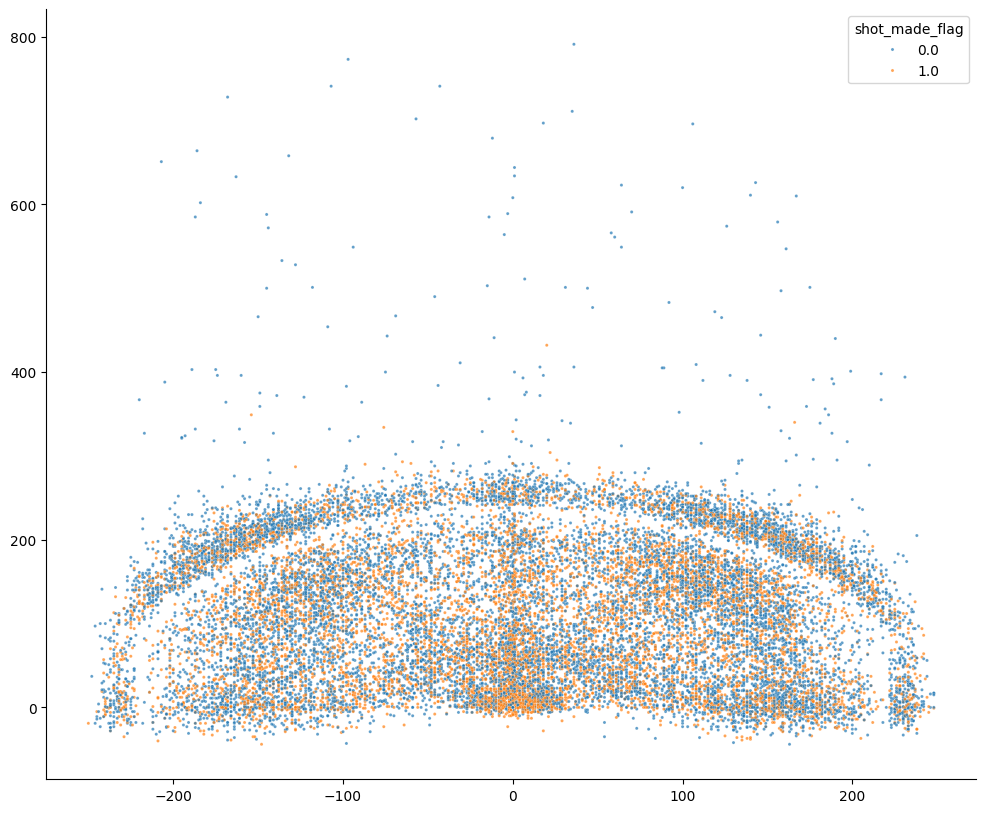

In [89]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x=df_kobe['loc_x'], y=df_kobe['loc_y'], hue=df_kobe['shot_made_flag'], s=5, alpha=0.7)
plt.xlabel("")
plt.ylabel("")
sns.despine()

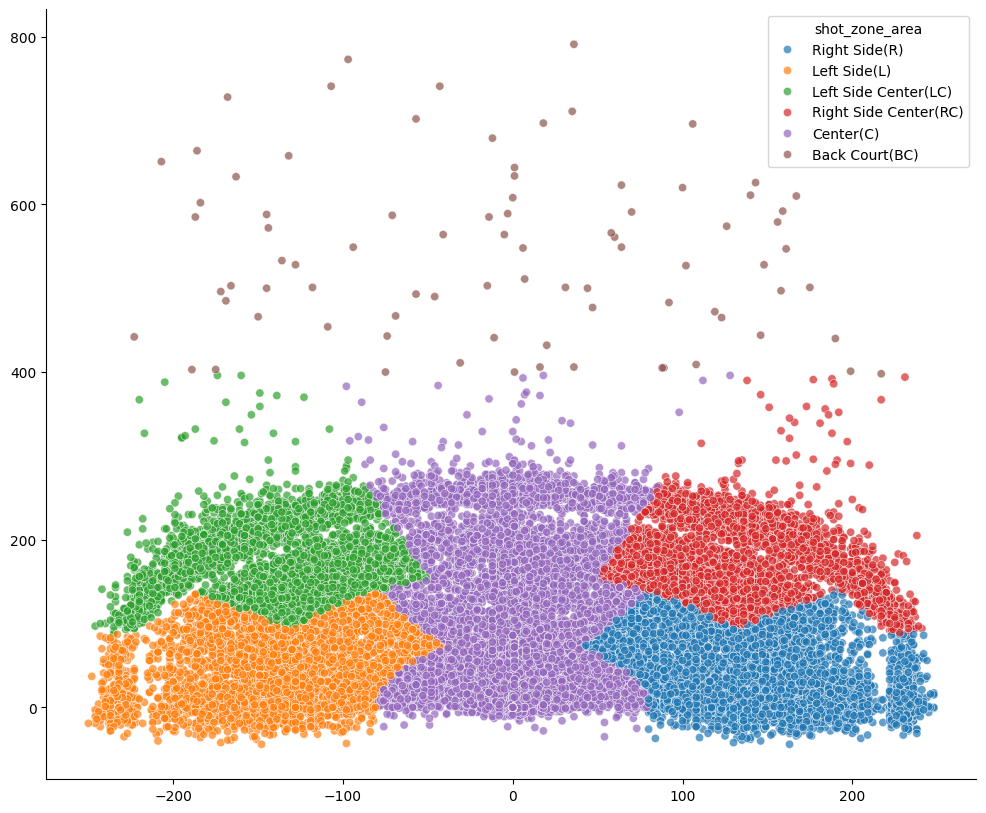

In [90]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x=df_kobe['loc_x'], y=df_kobe['loc_y'], hue=df_kobe['shot_zone_area'], alpha=0.7)
plt.xlabel("")
plt.ylabel("")
sns.despine()

<Figure size 1200x1000 with 0 Axes>

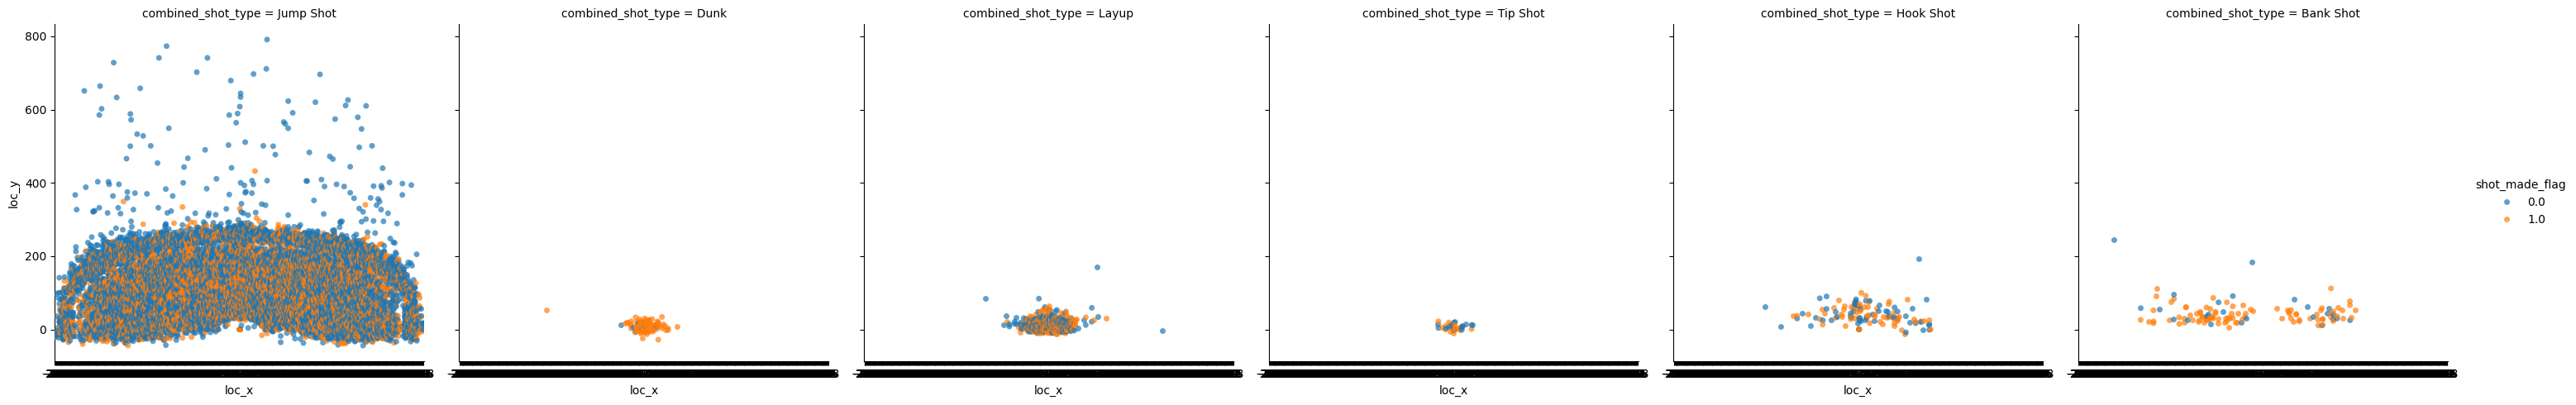

In [91]:
plt.figure(figsize=(12, 10))
sns.catplot(x=df_kobe['loc_x'], y=df_kobe['loc_y'], hue=df_kobe['shot_made_flag'], col=df_kobe['combined_shot_type'], alpha=0.7)
plt.xlabel("")
plt.ylabel("")
sns.despine()

In [92]:
df_kobe_semnull = df_kobe.dropna(subset='shot_made_flag')
df_kobe_semnull.shape

(25697, 25)

### Tipo de arremesso


In [93]:
tx_acerto_por_tipo_arremesso = df_kobe_semnull.groupby(['shot_type'])['shot_made_flag'].value_counts().unstack().reset_index()
tx_acerto_por_tipo_arremesso.rename(columns={0:'errou', 1:'acertou'}, inplace=True)

In [94]:
tx_acerto_por_tipo_arremesso['tx_acerto'] = tx_acerto_por_tipo_arremesso['acertou'] / (tx_acerto_por_tipo_arremesso['errou'] + tx_acerto_por_tipo_arremesso['acertou'])

<Axes: xlabel='shot_type', ylabel='count'>

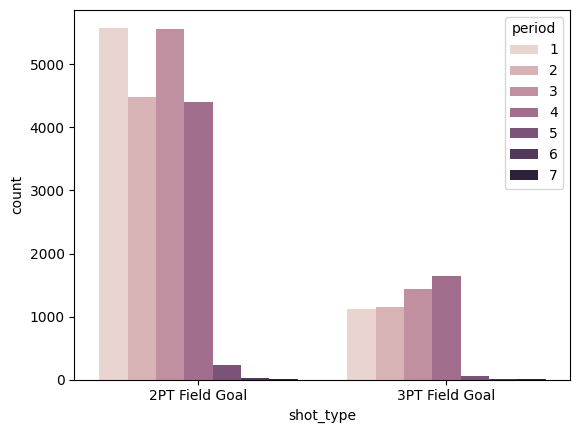

In [95]:
sns.countplot(data=df_kobe_semnull, x='shot_type', hue='period')

<Axes: xlabel='shot_type', ylabel='tx_acerto'>

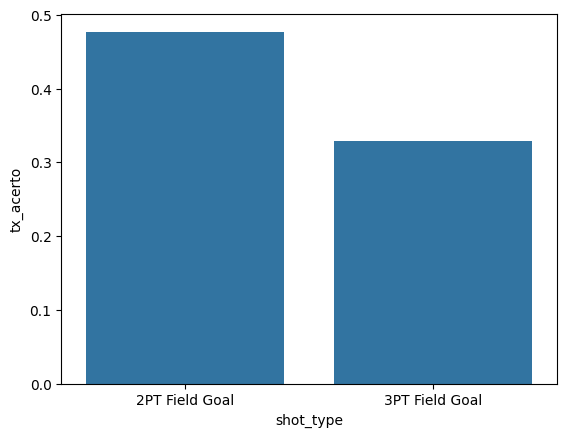

In [96]:
sns.barplot(x=tx_acerto_por_tipo_arremesso['shot_type'], y=tx_acerto_por_tipo_arremesso['tx_acerto'])

### Area do Arremesso

In [97]:
tx_acerto_por_zona_do_arremesso = df_kobe_semnull.groupby(['shot_zone_area'])['shot_made_flag'].value_counts().unstack().reset_index()
tx_acerto_por_zona_do_arremesso.rename(columns={0:'errou', 1:'acertou'}, inplace=True)

In [98]:
tx_acerto_por_zona_do_arremesso['tx_acerto'] = tx_acerto_por_zona_do_arremesso['acertou'] / (tx_acerto_por_zona_do_arremesso['errou'] + tx_acerto_por_zona_do_arremesso['acertou'])

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Back Court(BC)'),
  Text(1, 0, 'Center(C)'),
  Text(2, 0, 'Left Side Center(LC)'),
  Text(3, 0, 'Left Side(L)'),
  Text(4, 0, 'Right Side Center(RC)'),
  Text(5, 0, 'Right Side(R)')])

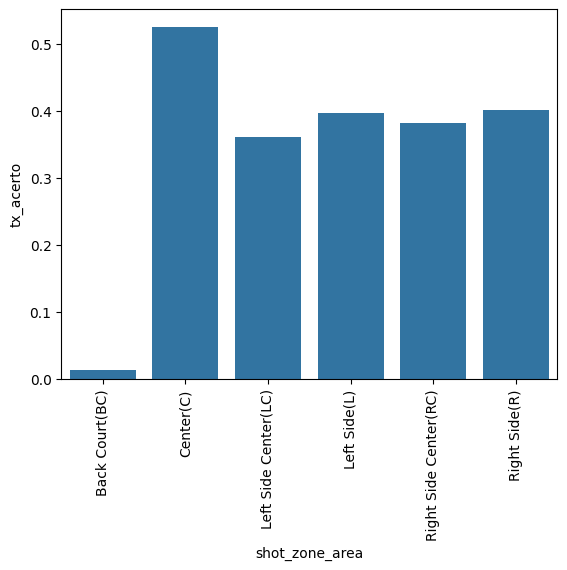

In [99]:
sns.barplot(x=tx_acerto_por_zona_do_arremesso['shot_zone_area'], y=tx_acerto_por_zona_do_arremesso['tx_acerto'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '2000-01'),
  Text(1, 0, '2001-02'),
  Text(2, 0, '2002-03'),
  Text(3, 0, '2003-04'),
  Text(4, 0, '2004-05'),
  Text(5, 0, '2005-06'),
  Text(6, 0, '2006-07'),
  Text(7, 0, '2007-08'),
  Text(8, 0, '2008-09'),
  Text(9, 0, '2009-10'),
  Text(10, 0, '2010-11'),
  Text(11, 0, '2011-12'),
  Text(12, 0, '2012-13'),
  Text(13, 0, '2013-14'),
  Text(14, 0, '2014-15'),
  Text(15, 0, '2015-16'),
  Text(16, 0, '1996-97'),
  Text(17, 0, '1997-98'),
  Text(18, 0, '1998-99'),
  Text(19, 0, '1999-00')])

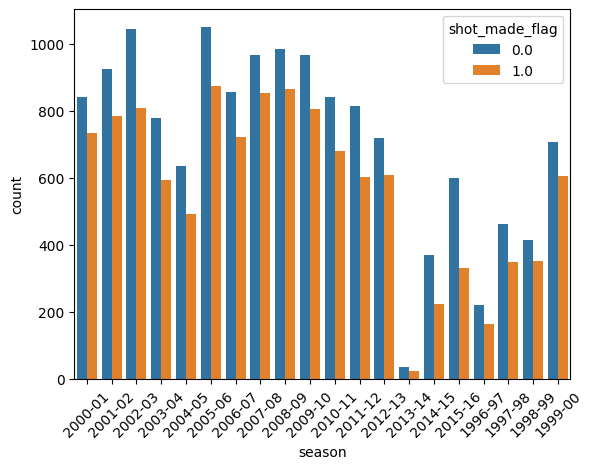

In [100]:
sns.countplot(x=df_kobe_semnull['season'], hue=df_kobe_semnull['shot_made_flag'])
plt.xticks(rotation=45)

In [101]:
arremessos_por_area = df_kobe.groupby('shot_zone_area')['shot_type'].value_counts().unstack().reset_index()
arremessos_por_area

shot_type         shot_zone_area  2PT Field Goal  3PT Field Goal
0                 Back Court(BC)               1              82
1                      Center(C)           12355            1100
2           Left Side Center(LC)            1842            2202
3                   Left Side(L)            3467             284
4          Right Side Center(RC)            2409            2367
5                  Right Side(R)            4197             391

In [102]:
arremessos_por_area = pd.crosstab(df_kobe['shot_type'], df_kobe['shot_zone_area'])
arremessos_por_area

shot_zone_area  Back Court(BC)  Center(C)  Left Side Center(LC)  Left Side(L)  \
shot_type                                                                       
2PT Field Goal               1      12355                  1842          3467   
3PT Field Goal              82       1100                  2202           284   

shot_zone_area  Right Side Center(RC)  Right Side(R)  
shot_type                                             
2PT Field Goal                   2409           4197  
3PT Field Goal                   2367            391

<Axes: xlabel='shot_type'>

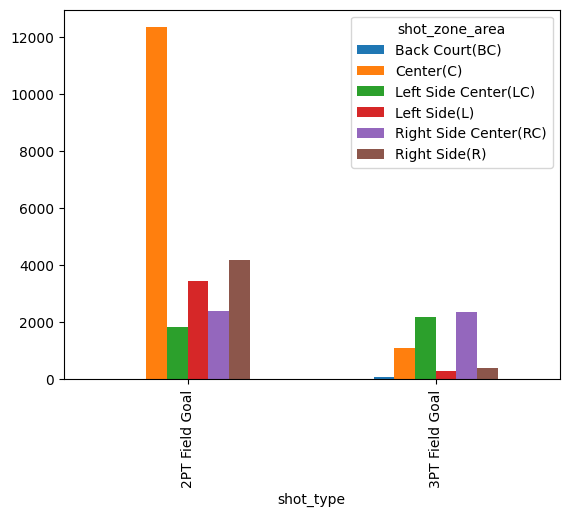

In [103]:
arremessos_por_area.plot(kind='bar')

In [104]:
df_kobe_semnull['shot_type'].unique()

array(['2PT Field Goal', '3PT Field Goal'], dtype=object)

#**Aula 4 - Correlações**


In [106]:
from scipy import stats

In [107]:
df = pd.read_csv('https://jpbarddal.github.io/assets/data/datascience/meses_producao_custo.csv')
df.head()

Meses  litros  custo
0   Jan   20200  19000
1   Fev   16700  17000
2   Mar   14800  14000
3   Abr   16000  15000
4   Mai   12100  14000

Text(0, 0.5, '')

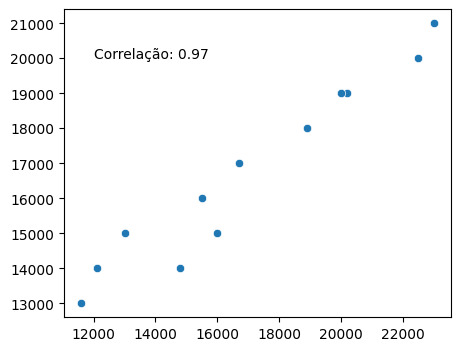

In [119]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x=df['litros'], y=df['custo'])
r, _ = stats.pearsonr(df['litros'], df['custo'])
plt.text(x=12_000, y=20_000, s=f'Correlação: {r:.2f}')
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

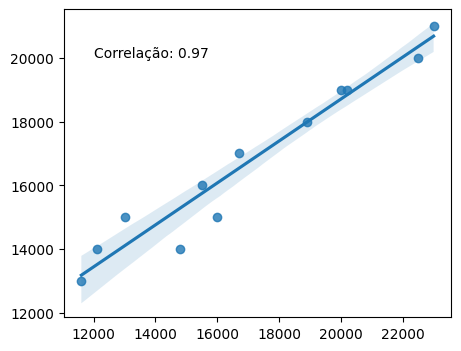

In [120]:
plt.figure(figsize=(5, 4))
sns.regplot(x=df['litros'], y=df['custo'])
r, _ = stats.pearsonr(df['litros'], df['custo'])
plt.text(x=12_000, y=20_000, s=f'Correlação: {r:.2f}')
plt.xlabel("")
plt.ylabel("")

Text(37.722222222222214, 0.5, '')

<Figure size 500x400 with 0 Axes>

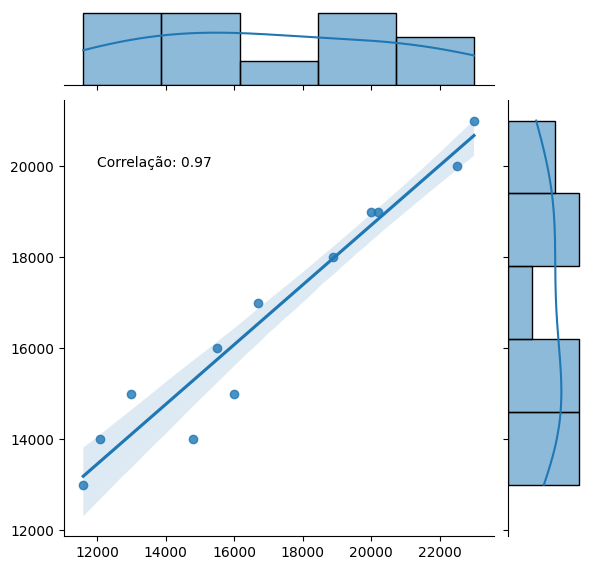

In [122]:
plt.figure(figsize=(5, 4))
sns.jointplot(x=df['litros'], y=df['custo'], kind='reg')
r, _ = stats.pearsonr(df['litros'], df['custo'])
plt.text(x=12_000, y=20_000, s=f'Correlação: {r:.2f}')
plt.xlabel("")
plt.ylabel("")

Text(-2, 1.0, 'Pearson r = 0.00')

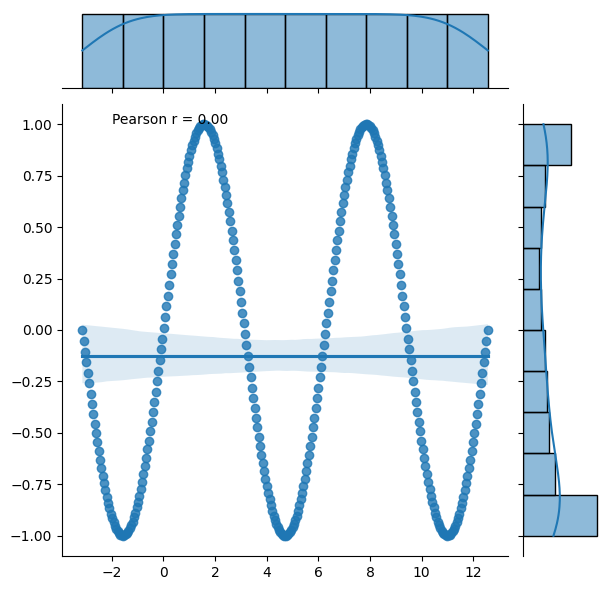

In [123]:
x = np.linspace(-np.pi, 4*np.pi, 300)
y = np.sin(x)
sns.jointplot(x=x, y=y, kind='reg')
r, _ = stats.pearsonr(x, y)
plt.text(x=-2, y=1.0, s=f'Pearson r = {r:.2f}')


In [124]:
df.select_dtypes(include='number').corr()

litros     custo
litros  1.000000  0.969993
custo   0.969993  1.000000

In [129]:
df_ommlbd = pd.read_csv('https://jpbarddal.github.io/assets/data/datascience/ommlbd_familiar.csv')
df_ommlbd = df_ommlbd.replace(-9999, np.nan)

In [130]:
df_ommlbd.corr()

HS_CPF  QTDPESSOASCASA  MENORRENDACASA  \
HS_CPF                   1.000000        0.019929       -0.024549   
QTDPESSOASCASA           0.019929        1.000000       -0.183627   
MENORRENDACASA          -0.024549       -0.183627        1.000000   
MAIORRENDACASA          -0.020831        0.053948        0.352656   
SOMARENDACASA           -0.018844        0.252608        0.433097   
MEDIARENDACASA          -0.027608       -0.103643        0.615976   
MAIORIDADECASA           0.041364        0.259603        0.106155   
MENORIDADECASA           0.026502       -0.166085        0.269575   
MEDIAIDADECASA           0.035755       -0.033299        0.232897   
INDICMENORDEIDADE       -0.034576        0.115711       -0.074302   
COBRANCABAIXOCASA        0.072836        0.109687        0.012774   
COBRANCAMEDIOCASA        0.014370        0.033187        0.004359   
COBRANCAALTACASA         0.035500        0.031315       -0.006413   
SEGMENTACAOFINBAIXACASA  0.127453        0.078343       -0.010084   
SEGMENTACAOFINMEDIACASA  0.001258        0.010212       -0.000067   
SEGMENTACAOALTACASA      0.001693        0.002181        0.008744   
BOLSAFAMILIACASA         0.060586        0.248071       -0.226525   
FUNCIONARIOPUBLICOCASA   0.000733        0.078393        0.106405   

                         MAIORRENDACASA  SOMARENDACASA  MEDIARENDACASA  \
HS_CPF                        -0.020831      -0.018844       -0.027608   
QTDPESSOASCASA                 0.053948       0.252608       -0.103643   
MENORRENDACASA                 0.352656       0.433097        0.615976   
MAIORRENDACASA                 1.000000       0.923269        0.917403   
SOMARENDACASA                  0.923269       1.000000        0.880107   
MEDIARENDACASA                 0.917403       0.880107        1.000000   
MAIORIDADECASA                 0.219026       0.285825        0.198684   
MENORIDADECASA                 0.144396       0.145600        0.230392   
MEDIAIDADECASA                 0.218736       0.244595        0.269323   
INDICMENORDEIDADE             -0.040999      -0.036681       -0.072104   
COBRANCABAIXOCASA              0.045489       0.073351        0.032249   
COBRANCAMEDIOCASA              0.015623       0.025266        0.011203   
COBRANCAALTACASA               0.003079       0.010955       -0.002031   
SEGMENTACAOFINBAIXACASA        0.004508       0.023593       -0.006555   
SEGMENTACAOFINMEDIACASA        0.008445       0.011624        0.006487   
SEGMENTACAOALTACASA            0.004686       0.006083        0.006899   
BOLSAFAMILIACASA              -0.208776      -0.189434       -0.257195   
FUNCIONARIOPUBLICOCASA         0.200532       0.230712        0.195284   

                         MAIORIDADECASA  MENORIDADECASA  MEDIAIDADECASA  \
HS_CPF                         0.041364        0.026502        0.035755   
QTDPESSOASCASA                 0.259603       -0.166085       -0.033299   
MENORRENDACASA                 0.106155        0.269575        0.232897   
MAIORRENDACASA                 0.219026        0.144396        0.218736   
SOMARENDACASA                  0.285825        0.145600        0.244595   
MEDIARENDACASA                 0.198684        0.230392        0.269323   
MAIORIDADECASA                 1.000000        0.489634        0.836517   
MENORIDADECASA                 0.489634        1.000000        0.844348   
MEDIAIDADECASA                 0.836517        0.844348        1.000000   
INDICMENORDEIDADE             -0.121856       -0.227301       -0.218414   
COBRANCABAIXOCASA              0.064165        0.032271        0.046645   
COBRANCAMEDIOCASA              0.014462        0.008302        0.010607   
COBRANCAALTACASA               0.016789        0.009470        0.011476   
SEGMENTACAOFINBAIXACASA        0.028294        0.001591        0.009690   
SEGMENTACAOFINMEDIACASA        0.007349        0.003308        0.005007   
SEGMENTACAOALTACASA            0.002348       -0.000865        0.001161   
BOLSAFAMILIACASA              -0.

<Axes: >

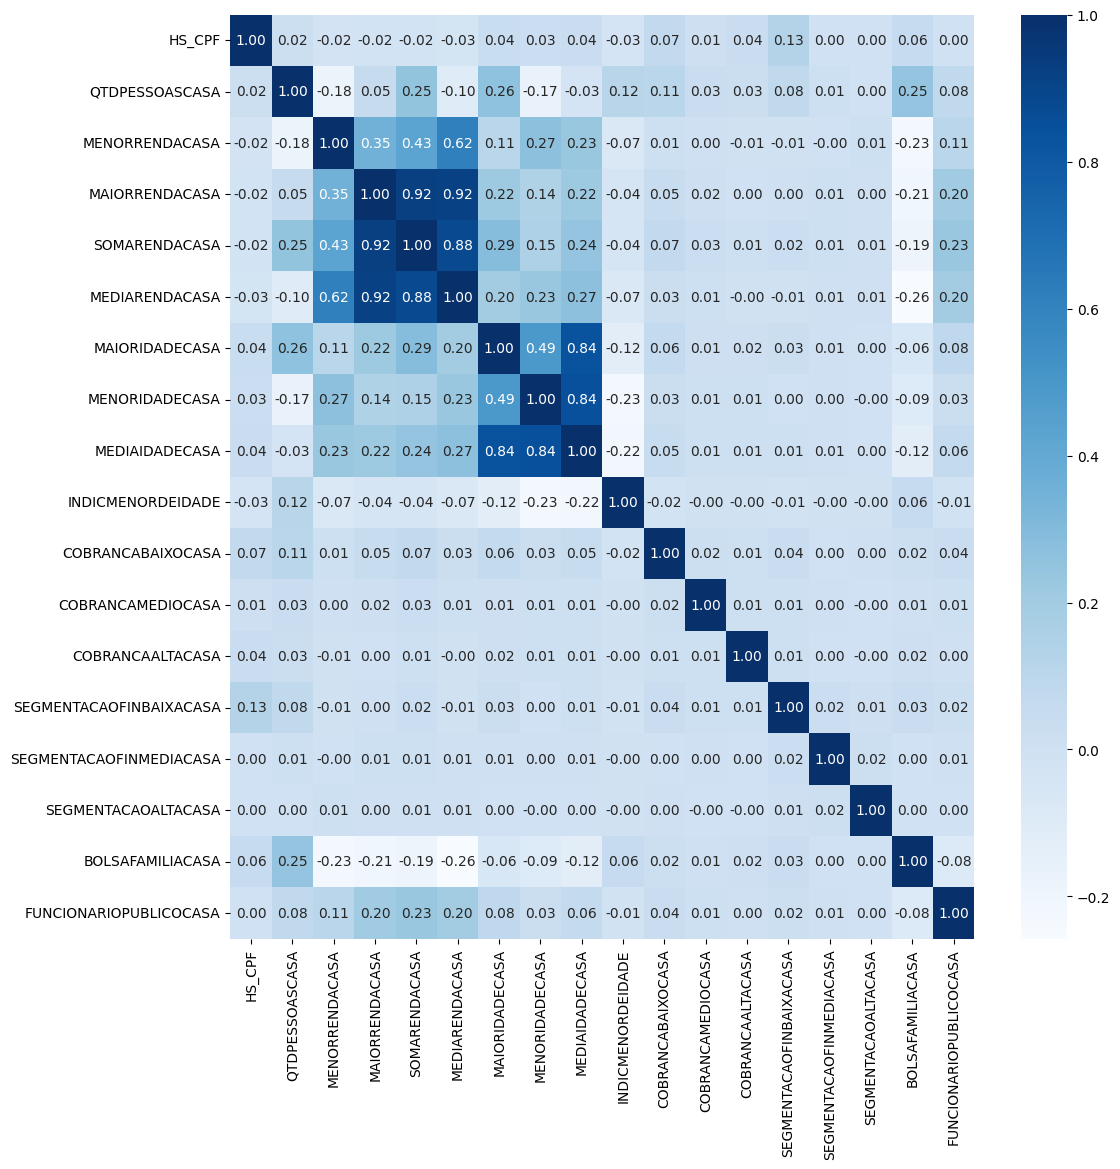

In [131]:
correlacoes = df_ommlbd.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlacoes,
            annot=True,
            fmt='.2f',
            cmap='Blues')

<Axes: >

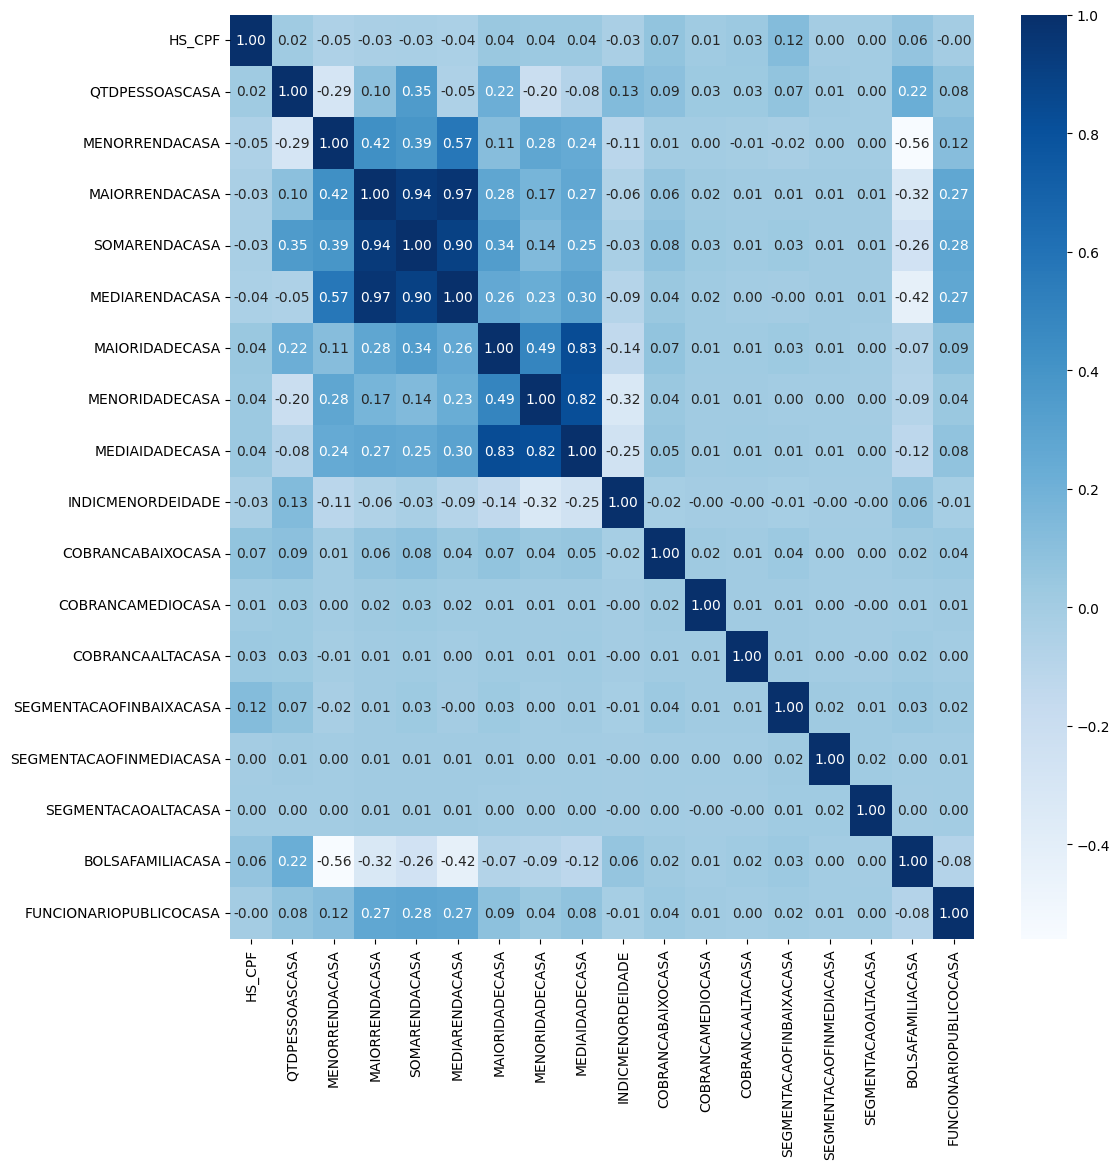

In [135]:
correlacoes_spearman = df_ommlbd.corr(method='spearman')
plt.figure(figsize=(12, 12))
sns.heatmap(correlacoes_spearman,
            annot=True,
            fmt='.2f',
            cmap='Blues')

Relação entre variáves categóricas

In [159]:
df_titanic = pd.read_csv('https://jpbarddal.github.io/assets/data/datascience/titanic.csv')
df_titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

<Axes: xlabel='Survived', ylabel='Pclass'>

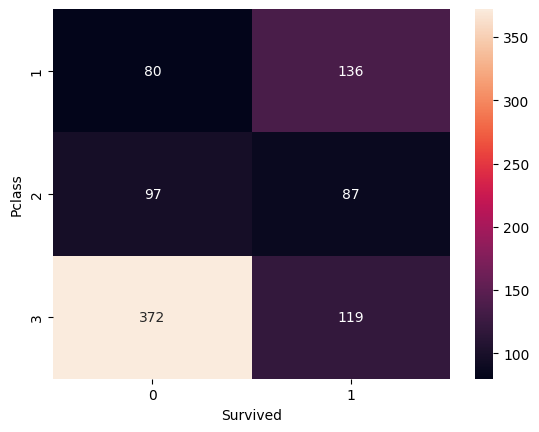

In [160]:
# Relação entre sobreviventes e classe
ctab = pd.crosstab(df_titanic['Pclass'], df_titanic['Survived'])
sns.heatmap(ctab, annot=True, fmt='d')

<Axes: xlabel='Survived', ylabel='Pclass'>

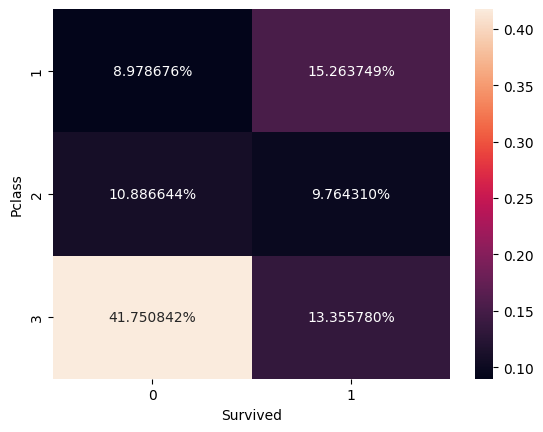

In [161]:
# Normalização pelo todo
ctab = pd.crosstab(df_titanic['Pclass'], df_titanic['Survived'], normalize='all')
sns.heatmap(ctab, annot=True, fmt='%')

<Axes: xlabel='Survived', ylabel='Pclass'>

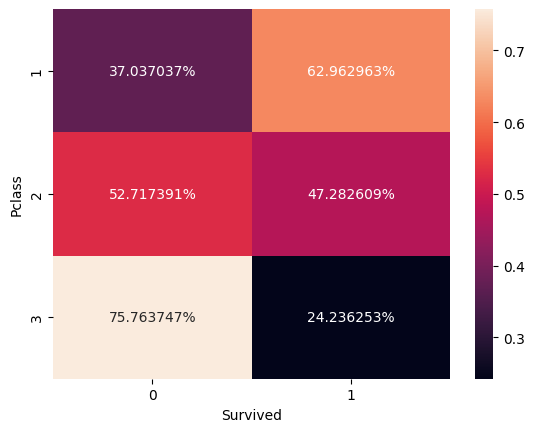

In [147]:
# Normalização pela linha
ctab = pd.crosstab(df_titanic['Pclass'], df_titanic['Survived'], normalize='index')
sns.heatmap(ctab, annot=True, fmt='%')

<Axes: xlabel='Survived', ylabel='Pclass'>

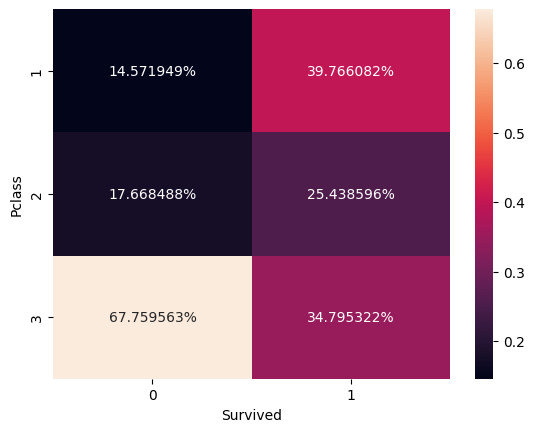

In [148]:
# Normalização pela coluna
ctab = pd.crosstab(df_titanic['Pclass'], df_titanic['Survived'], normalize='columns')
sns.heatmap(ctab, annot=True, fmt='%')

<Axes: xlabel='Survived', ylabel='Sex'>

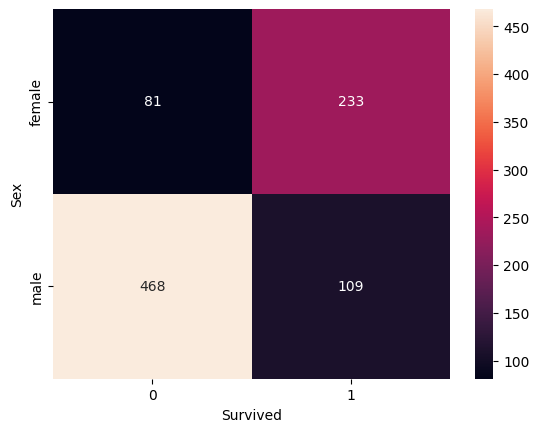

In [149]:
# Relação entre sobrevivente e sexo
ctab = pd.crosstab(df_titanic['Sex'], df_titanic['Survived'])
sns.heatmap(ctab, annot=True, fmt='d')

<Axes: xlabel='Survived', ylabel='Sex'>

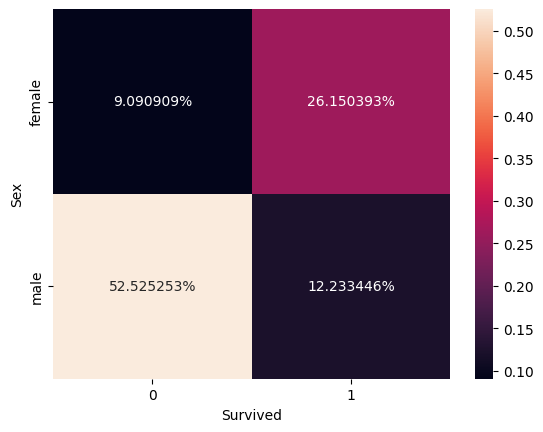

In [151]:
# Normalização pelo todo
ctab = pd.crosstab(df_titanic['Sex'], df_titanic['Survived'], normalize='all')
sns.heatmap(ctab, annot=True, fmt='%')

<Axes: xlabel='Survived', ylabel='Sex'>

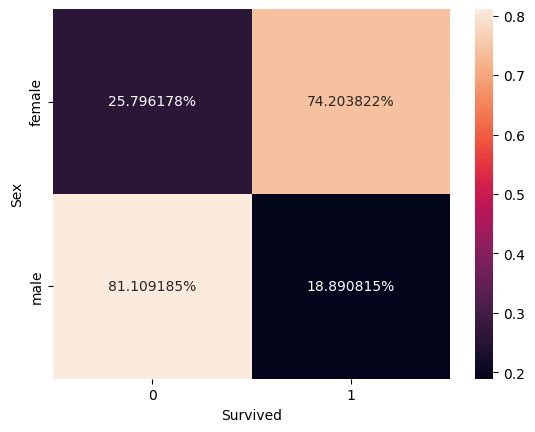

In [152]:
# Normalização pela linha
ctab = pd.crosstab(df_titanic['Sex'], df_titanic['Survived'], normalize='index')
sns.heatmap(ctab, annot=True, fmt='%')

<Axes: xlabel='Survived', ylabel='Sex'>

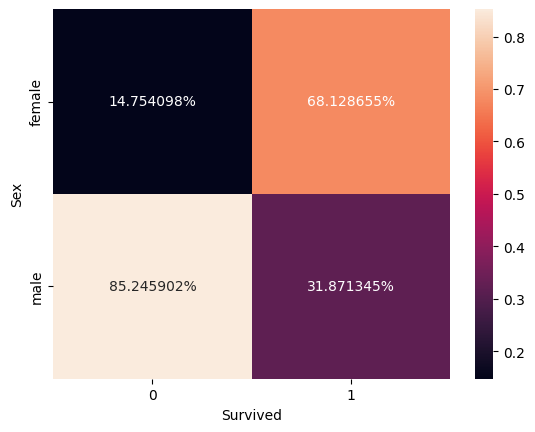

In [153]:
# Normalização pela coluna
ctab = pd.crosstab(df_titanic['Sex'], df_titanic['Survived'], normalize='columns')
sns.heatmap(ctab, annot=True, fmt='%')

<Axes: xlabel='Survived', ylabel='Sex-Pclass'>

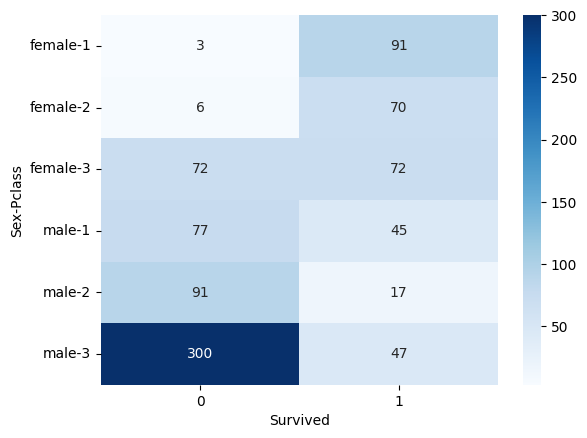

In [155]:
# Considerando mais colunas
ctab = pd.crosstab([df_titanic['Sex'], df_titanic['Pclass']],
                   df_titanic['Survived'])
sns.heatmap(ctab, annot=True, fmt='d', cmap='Blues')

In [164]:
# Relação entre sobrevivência e idade
# Adulto/criança
#df_titanic['Adulto_crianca'] = df_titanic['Age'] > 12
df_titanic['Adulto_crianca'] = df_titanic['Age'].apply(lambda x: 'Adulto' if x > 12 else 'Criança')

In [167]:
# Faixa de idade
def faixa_idade(x):
  if np.isnan(x):
    return 'Desconhecido'
  elif x <= 12:
    return 'Criança'
  elif x <= 18:
    return 'Adolescente'
  elif x <= 60:
    return 'Adulto'
  else:
    return 'Idoso'

df_titanic['Faixa_idade'] = df_titanic['Age'].apply(faixa_idade)

In [173]:
# Outra forma
df_titanic['fx_cut'] = pd.cut(df_titanic['Age'],
                              bins=[0, 12, 18, 60, np.inf],
                              labels=['Criança', 'Adolescente', 'Adulto', 'Idoso'])
df_titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Faixa_idade Adulto_crianca  \
0      0         A/5 21171   7.2500   NaN        S      Adulto         Adulto   
1      0          PC 17599  71.2833   C85        C      Adulto         Adulto   
2      0  STON/O2. 3101282   7.9250   NaN        S      Adulto         Adulto   
3      0            113803  53.1000  C123        S      Adulto         Adulto   
4      0            373450   8.0500   NaN        S      Adulto         Adulto   

   fx_cut  
0  Adulto  
1  Adulto  
2  Adulto  
3  Adulto  
4  Adulto

<Axes: xlabel='Survived', ylabel='fx_cut'>

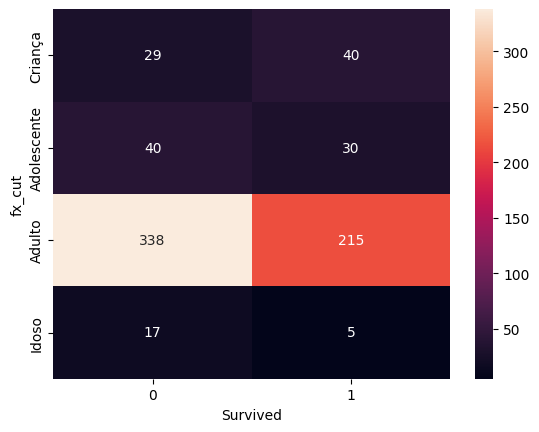

In [174]:
ctab = pd.crosstab(df_titanic['fx_cut'],
                   df_titanic['Survived'])
sns.heatmap(ctab, annot=True, fmt='d')